# Generate anndata object from Molkart output

In [1]:
from numpy.random import default_rng
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

import scanpy as sc
import squidpy as sq
import anndata as ad

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")
import warnings
warnings.filterwarnings('ignore')

/Users/florian_wuennemann/miniconda3/envs/liana_plus/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/florian_wuennemann/miniconda3/envs/liana_plus/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/florian_wuennemann/minicond

scanpy==1.9.4 anndata==0.9.2 umap==0.5.3 numpy==1.23.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10
squidpy==1.3.1


/Users/florian_wuennemann/miniconda3/envs/liana_plus/lib/python3.11/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [5]:
rng = default_rng(42)
counts = rng.integers(0, 15, size=(10, 100))  # feature matrix
coordinates = rng.uniform(0, 10, size=(10, 2))  # spatial coordinates
image = rng.uniform(0, 1, size=(10, 10, 3))  # image

counts

array([[ 1, 11,  9,  6,  6, 12,  1, 10,  3,  1,  7, 14, 11, 11, 10, 11,
         7,  1, 12,  6,  7,  5,  2, 13, 11,  9,  6, 12,  8,  6,  6,  3,
         1,  8, 13,  0, 12, 12,  4,  9,  2, 11, 10,  5,  1, 14,  6, 13,
        10, 11, 11,  2,  5,  7,  7,  0,  8,  2, 11, 10, 13, 11,  5, 14,
         6,  4, 13,  5,  1,  7, 11,  2,  6,  1, 10,  7,  4,  3,  8, 10,
        14,  6,  2, 12,  9, 10,  1,  4, 11, 12,  6, 12, 12,  5, 13,  4,
         3, 10,  9,  2],
       [12,  2, 12,  0, 11, 11, 11,  9,  7, 10,  4, 11,  8,  6,  7,  8,
         0,  2,  3,  1,  6, 10,  9,  7, 12,  8,  1, 11,  8,  9,  8,  8,
         1,  8, 11,  4,  9,  0,  5,  6, 14,  3,  4,  6, 14, 12,  0,  3,
        12,  0, 12,  4, 13,  4,  6,  9,  1,  8,  7, 11, 14,  9,  6,  6,
         6, 12,  4,  2,  5,  0,  1,  1, 11, 10, 10,  6, 10,  2, 13,  7,
        14,  2,  7, 10,  7,  6,  2,  5,  3,  4, 10,  9,  9,  5, 14,  1,
         5,  1,  5, 14],
       [ 5, 13,  7, 10,  6,  3, 11, 14,  3, 11,  3, 10, 11,  6, 11,  4,
         1,  1

In [2]:
## Read in counts and coordinates
import pandas as pd

# Read in spatial data
metadata = pd.read_csv('../../output/mol_cart/harmony_object.metadata_anndata.tsv', index_col=False, sep= "\t")
centroids_groups = {name: group[['X_centroid', 'Y_centroid']].to_numpy() for name, group in metadata.groupby('sample_ID')}

counts = pd.read_csv('../../output/mol_cart/harmony_object.counts_anndata.tsv', index_col=False, sep= "\t")
counts_groups = {name: csr_matrix(counts.loc[group.index].to_numpy()) for name, group in metadata.groupby('sample_ID')}

cell_types_groups = {name: group[['seurat_clusters', 'anno_cell_type_lvl1','anno_cell_type_lv2','anno_cell_type_lvl3']] for name, group in metadata.groupby('sample_ID')}

FileNotFoundError: [Errno 2] No such file or directory: '../../output/mol_cart/harmony_object.metadata_anndata.tsv'

In [3]:
## Generate an anndata object for each sample
anndata_objects = {name: ad.AnnData(counts_groups[name], 
                                    obsm={"spatial": centroids_groups[name]}) for name in metadata['sample_ID'].unique()}
## Set gene names
for name in anndata_objects.keys():
    anndata_objects[name].var_names = counts.columns

## Set metadata
for name in anndata_objects.keys():
    anndata_objects[name].obs = cell_types_groups[name]

In [4]:
anndata_objects.keys()

dict_keys(['sample_2d_r1_s1', 'sample_2d_r2_s1', 'sample_4d_r1_s1', 'sample_4d_r2_s1', 'sample_4h_r1_s1', 'sample_4h_r2_s2', 'sample_control_r1_s1', 'sample_control_r2_s1'])

sample_2d_r1_s1






























































100%|██████████| 1000/1000 [00:05<00:00, 179.93/s]






100%|██████████| 1/1 [00:09<00:00,  9.04s/]


sample_2d_r2_s1















































100%|██████████| 1000/1000 [00:04<00:00, 207.20/s]






100%|██████████| 1/1 [00:06<00:00,  6.52s/]


sample_control_r1_s1














































































































































































































100%|██████████| 1000/1000 [00:10<00:00, 92.86/s]






100%|██████████| 1/1 [00:28<00:00, 28.17s/]


sample_control_r2_s1







































































































































































100%|██████████| 1000/1000 [00:09<00:00, 103.43/s]






100%|██████████| 1/1 [00:22<00:00, 22.72s/]


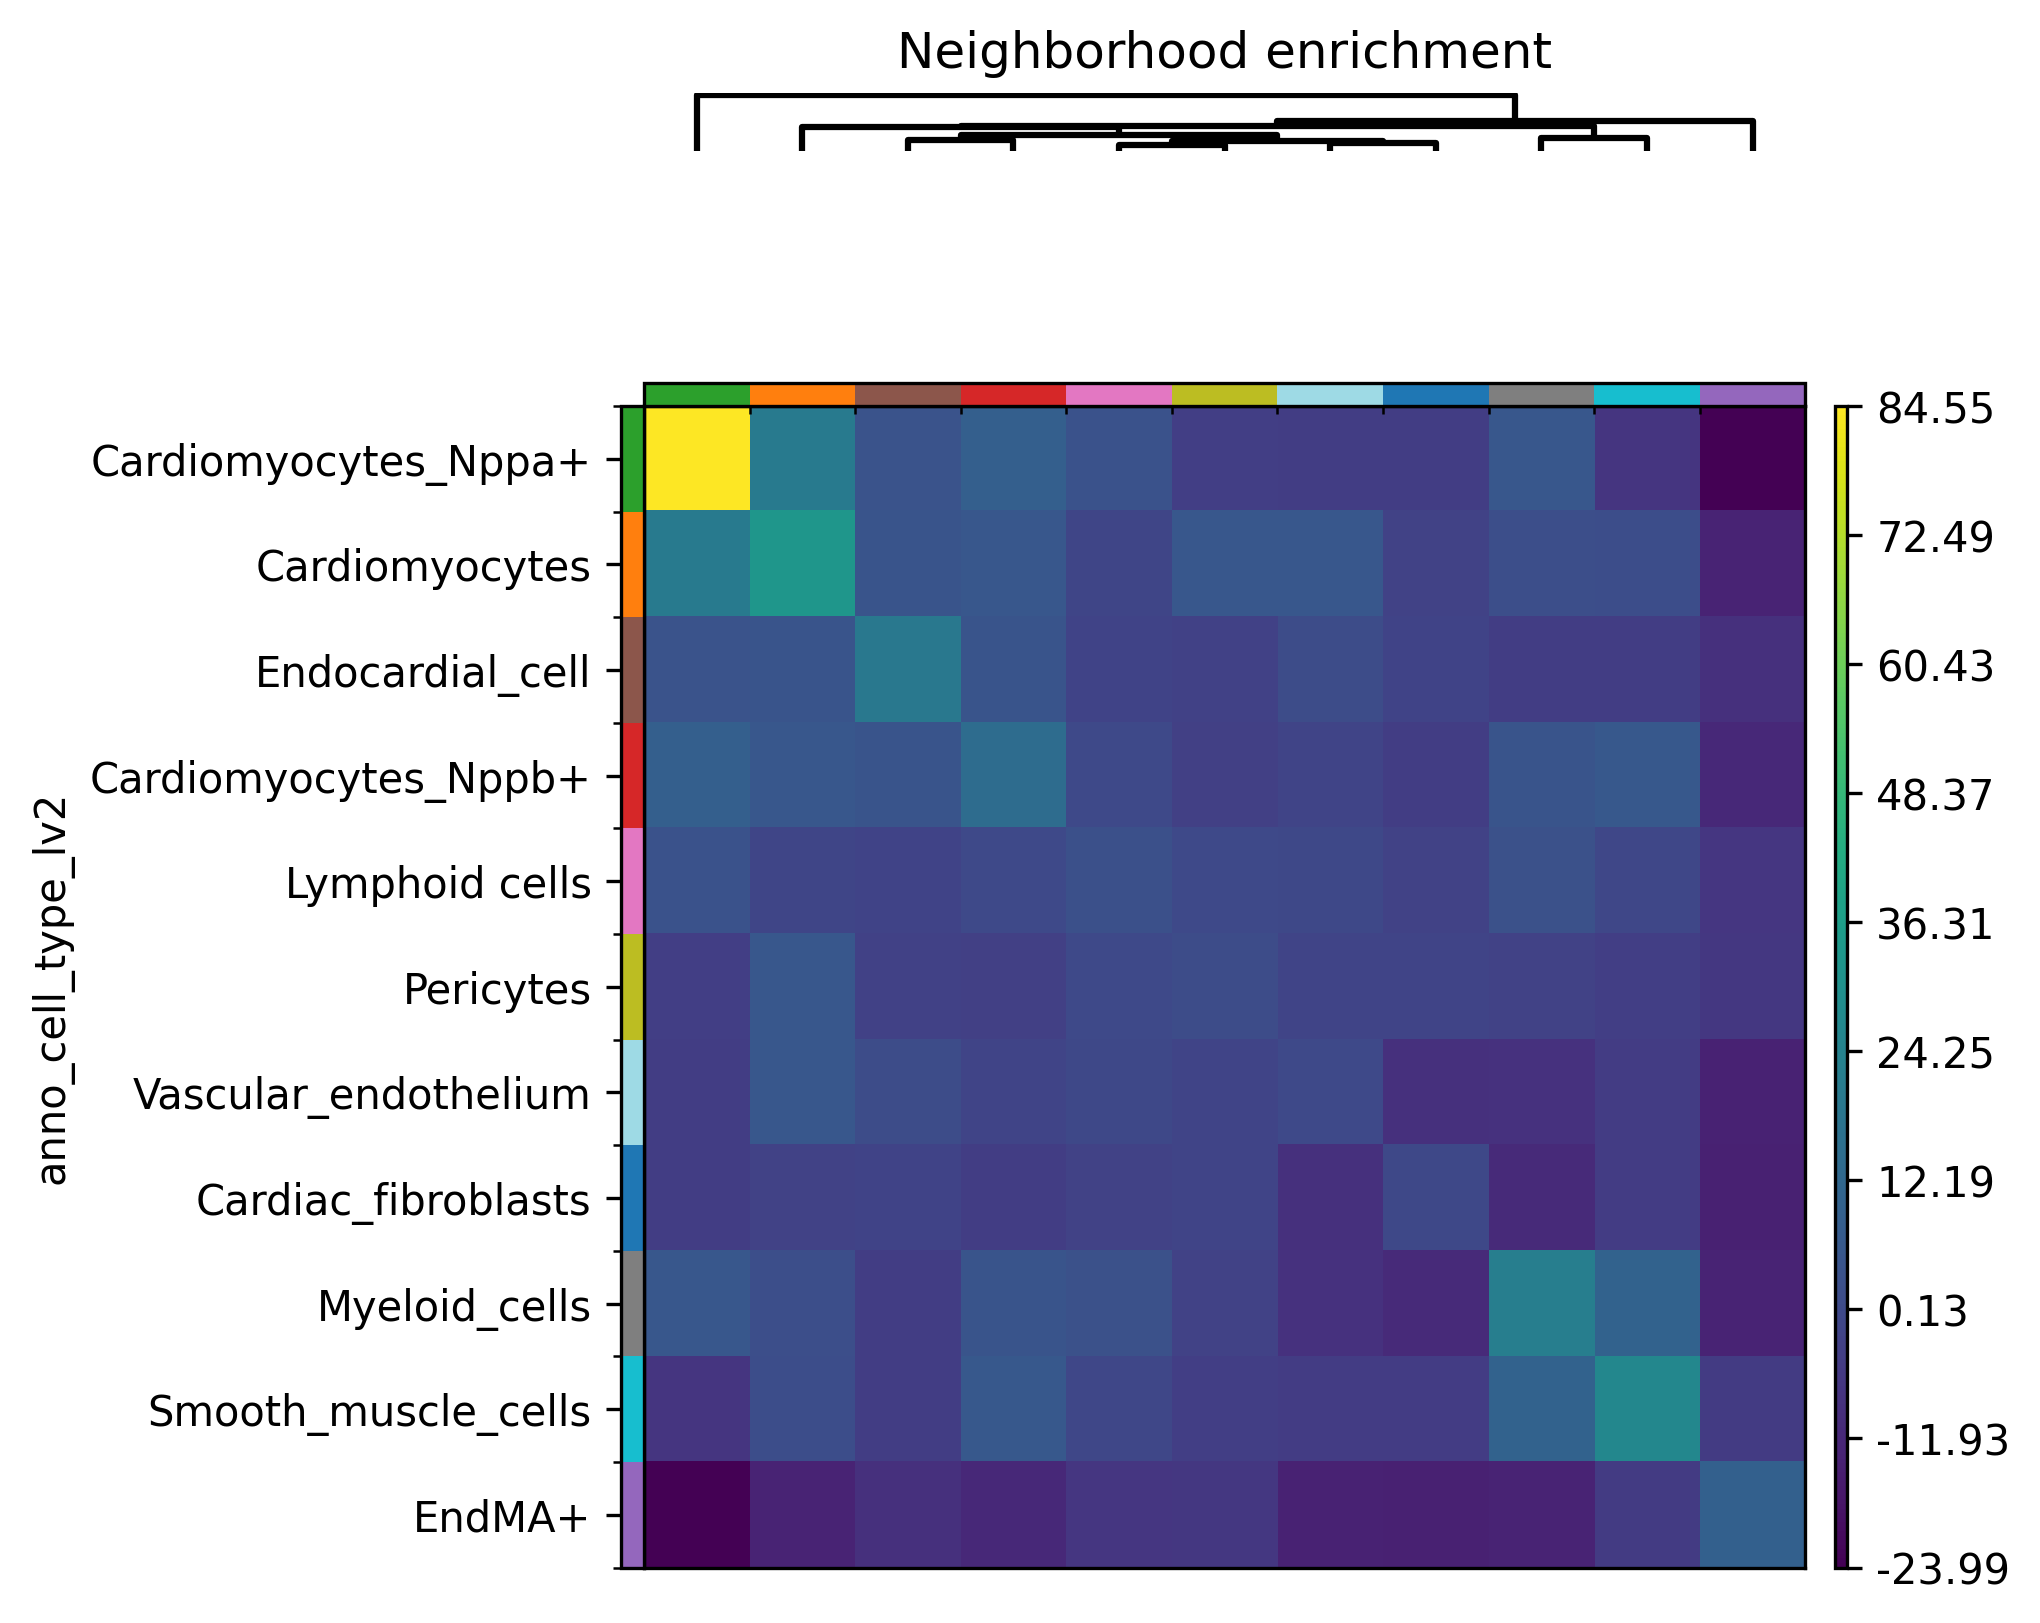

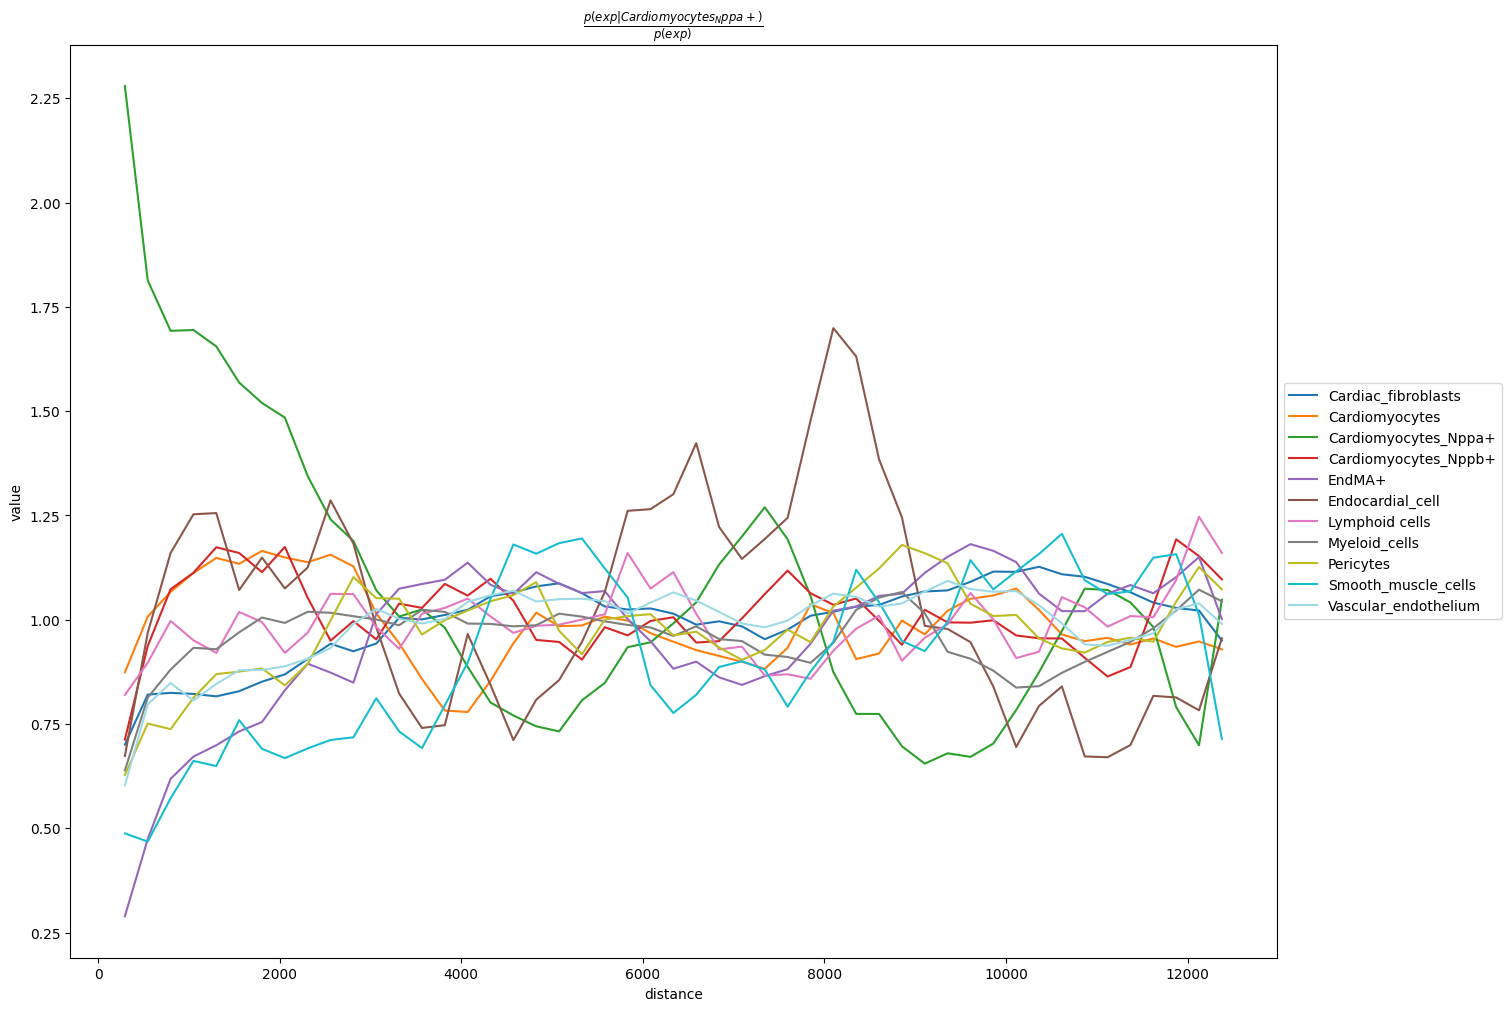

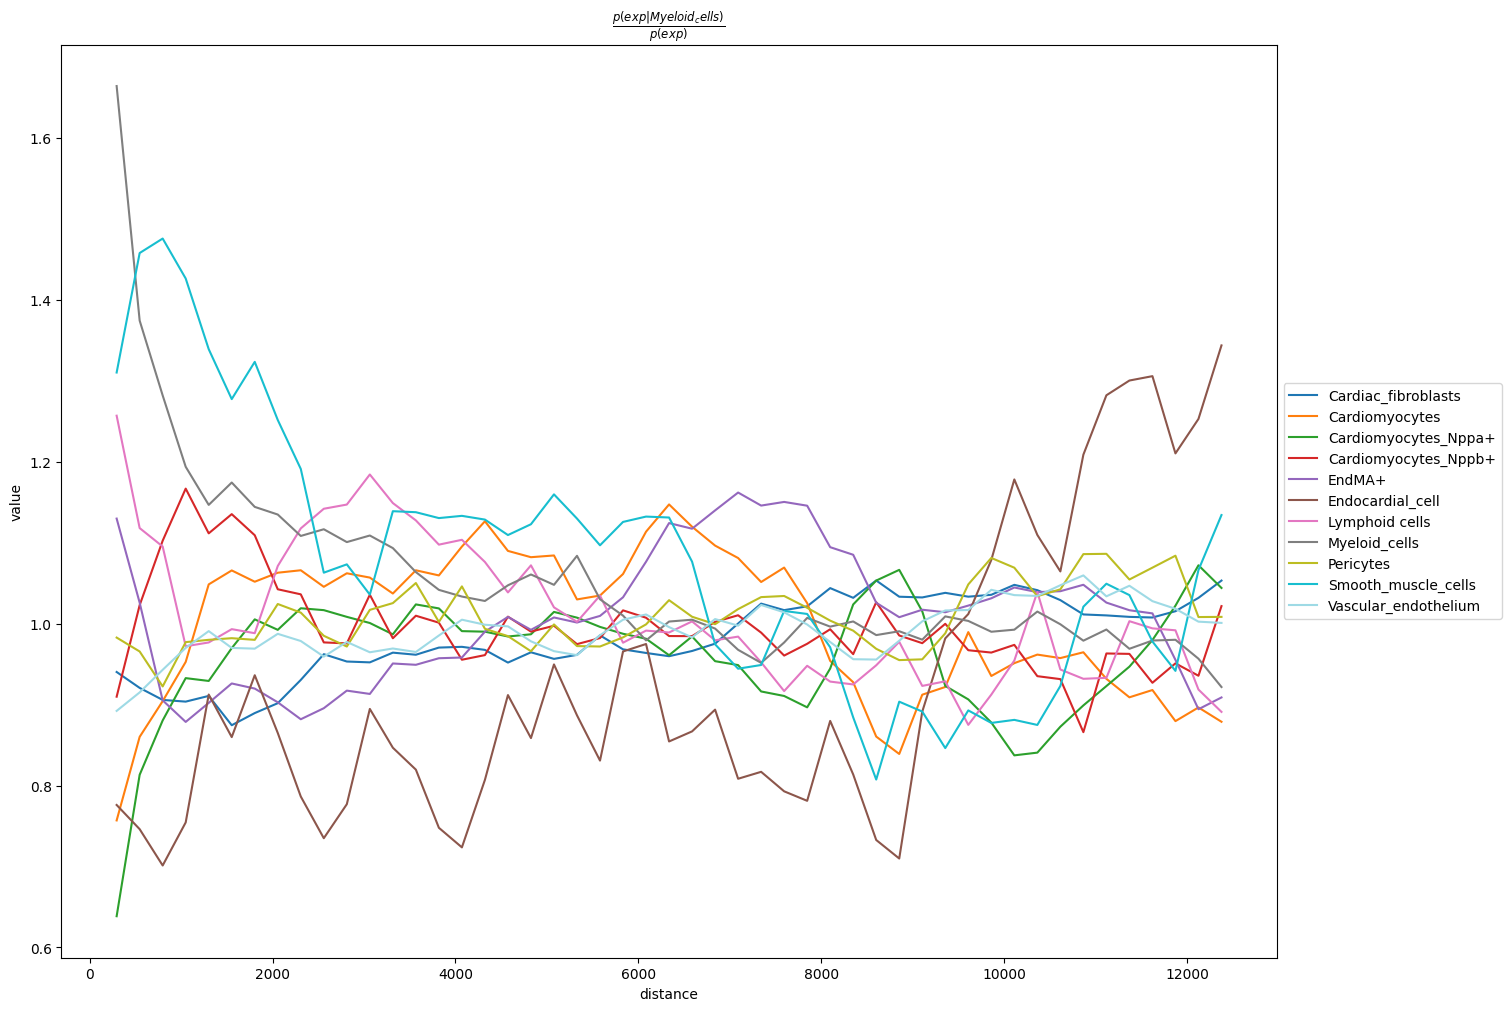

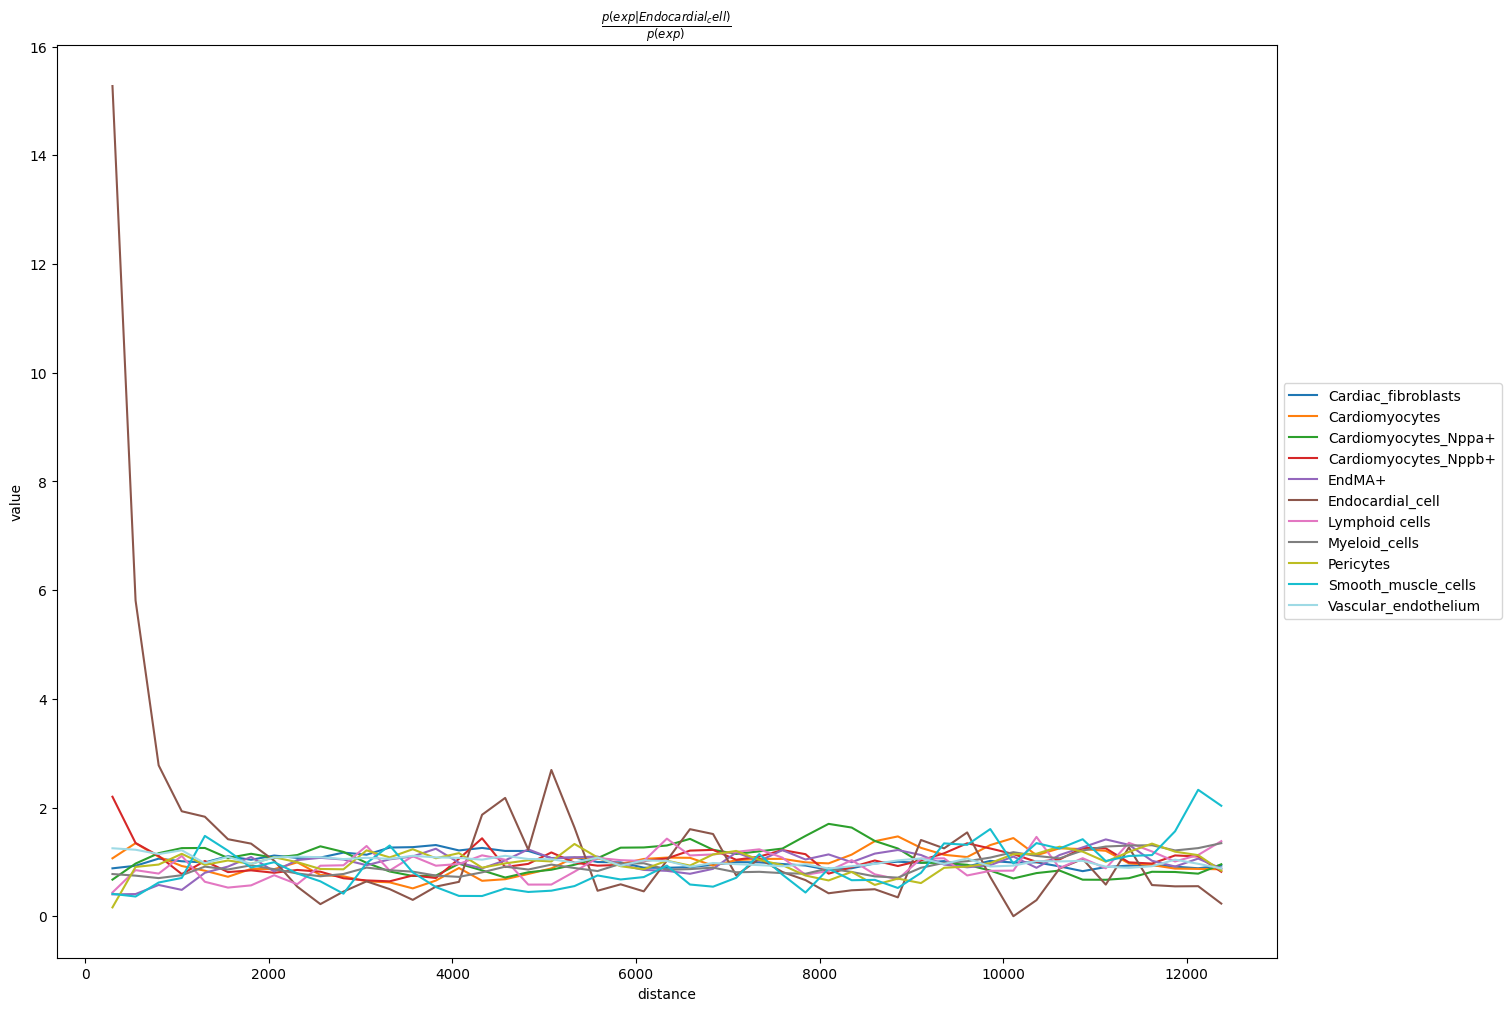

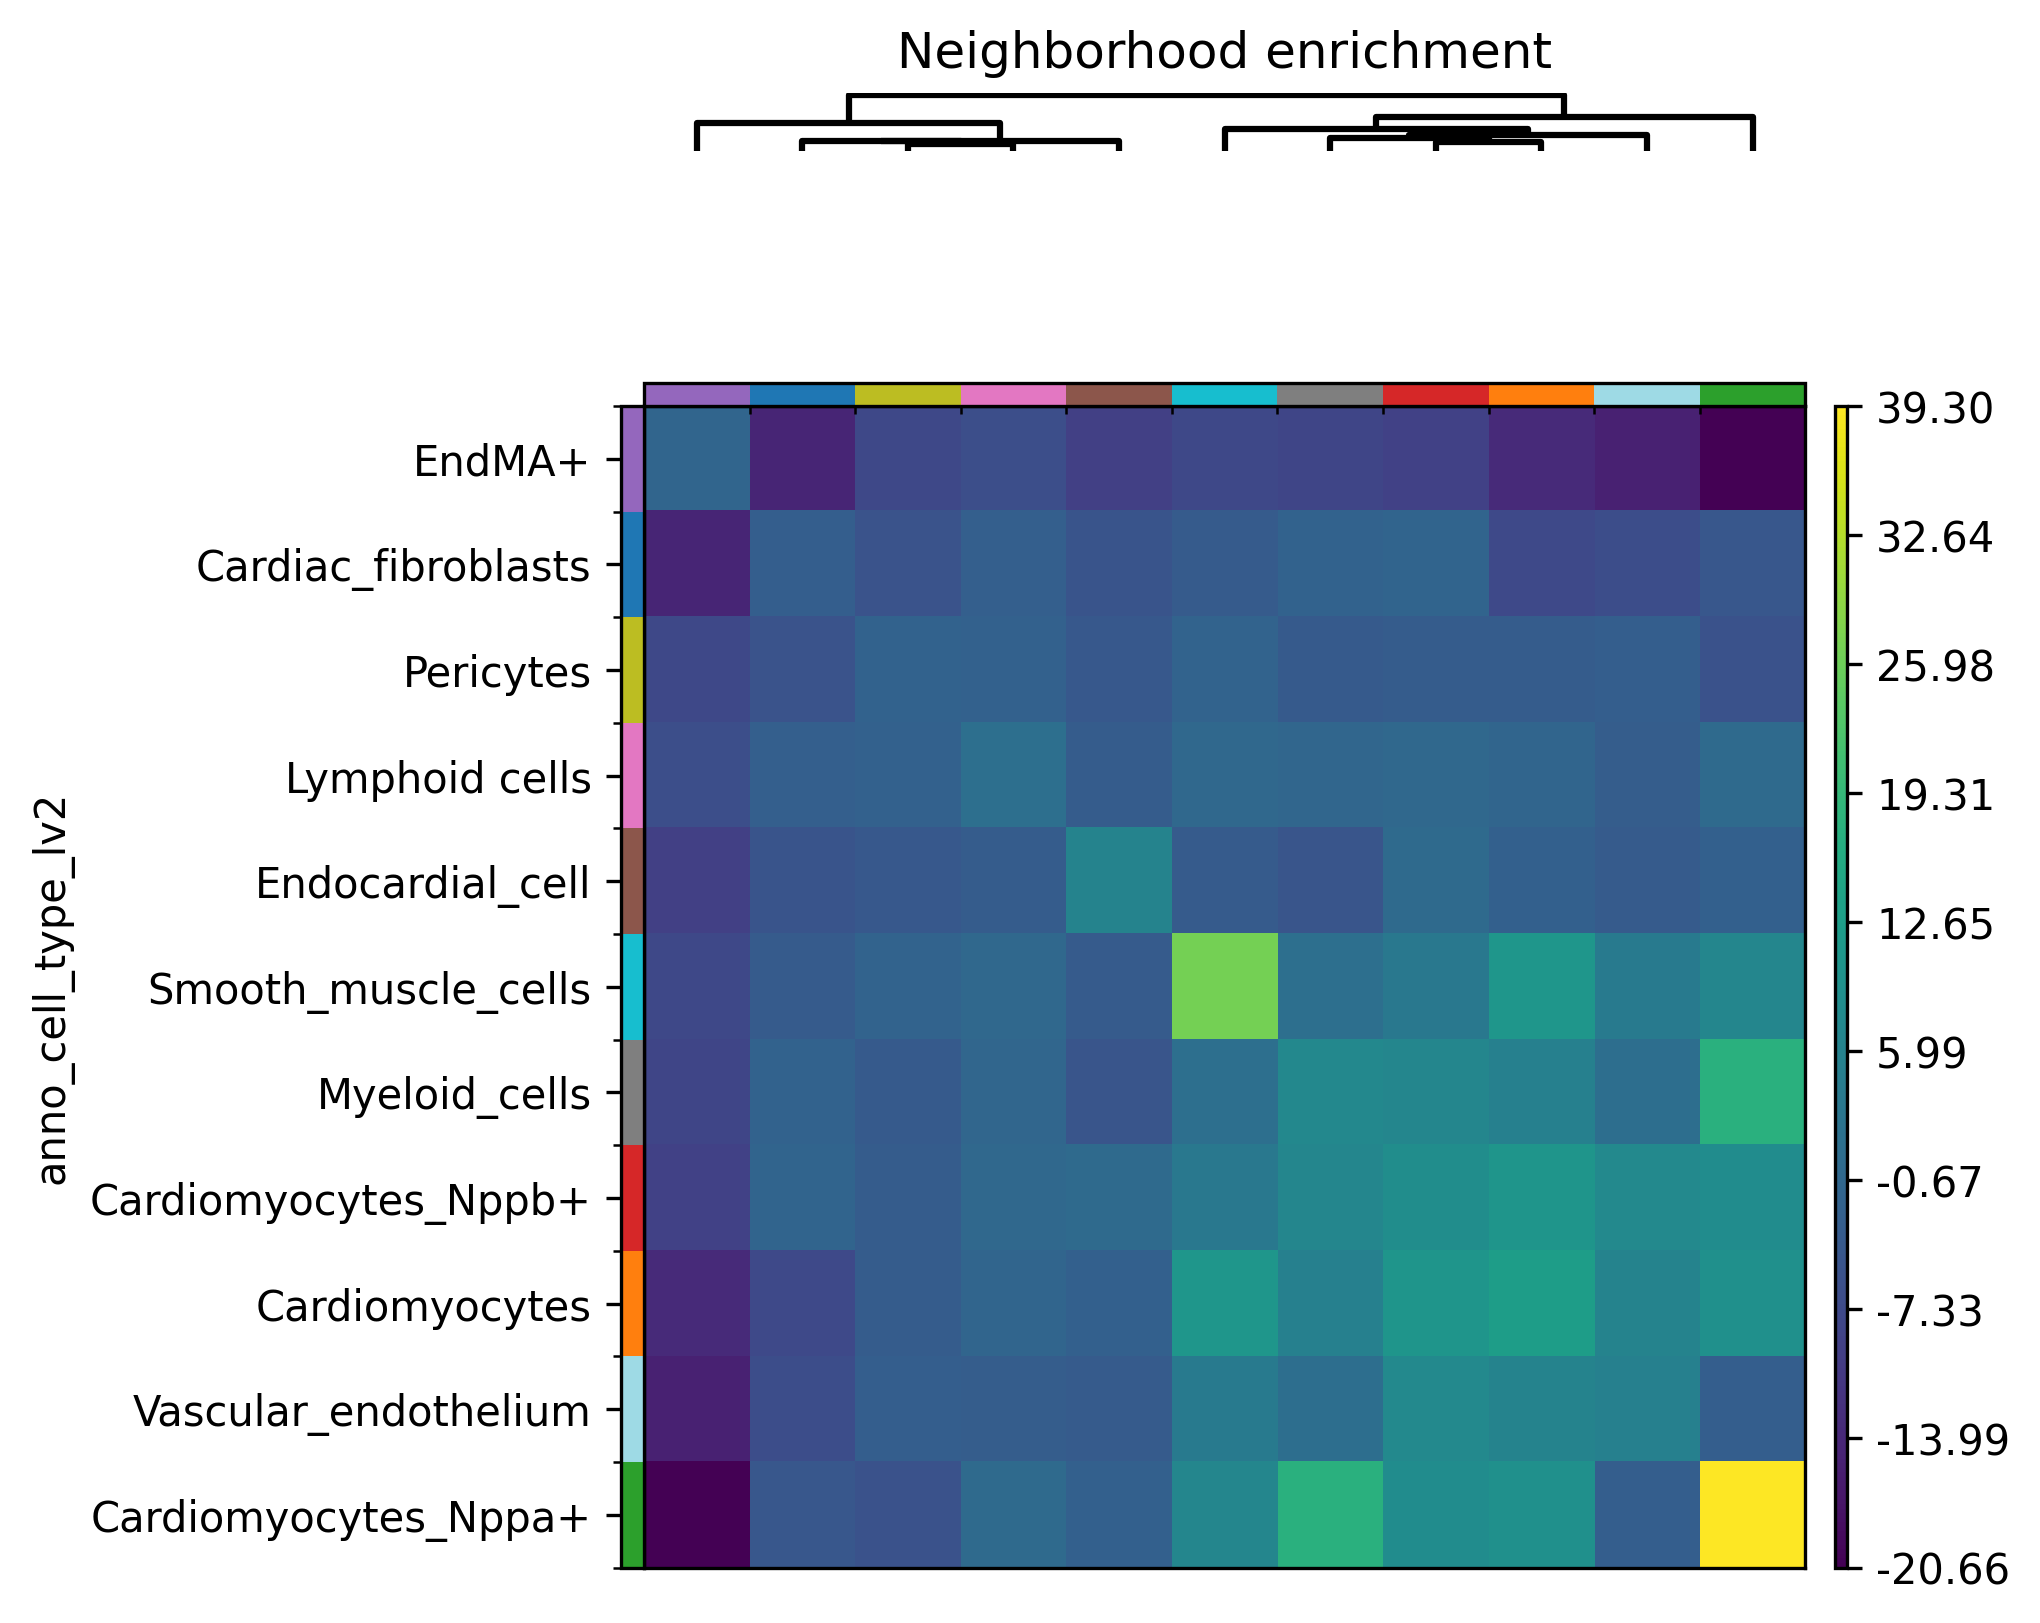

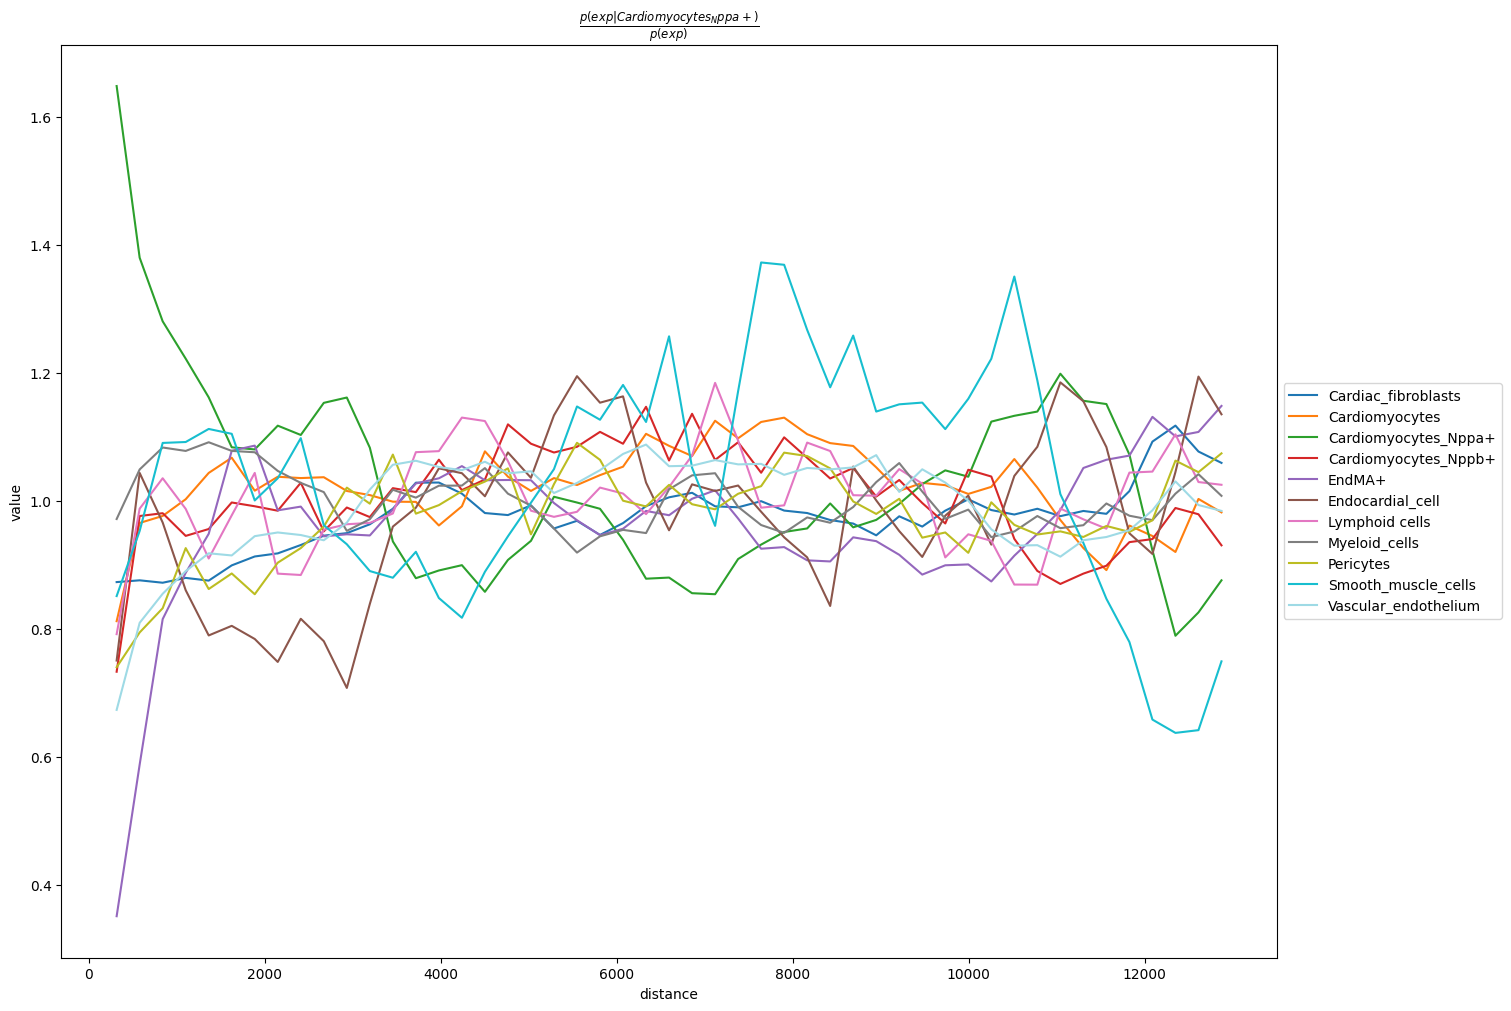

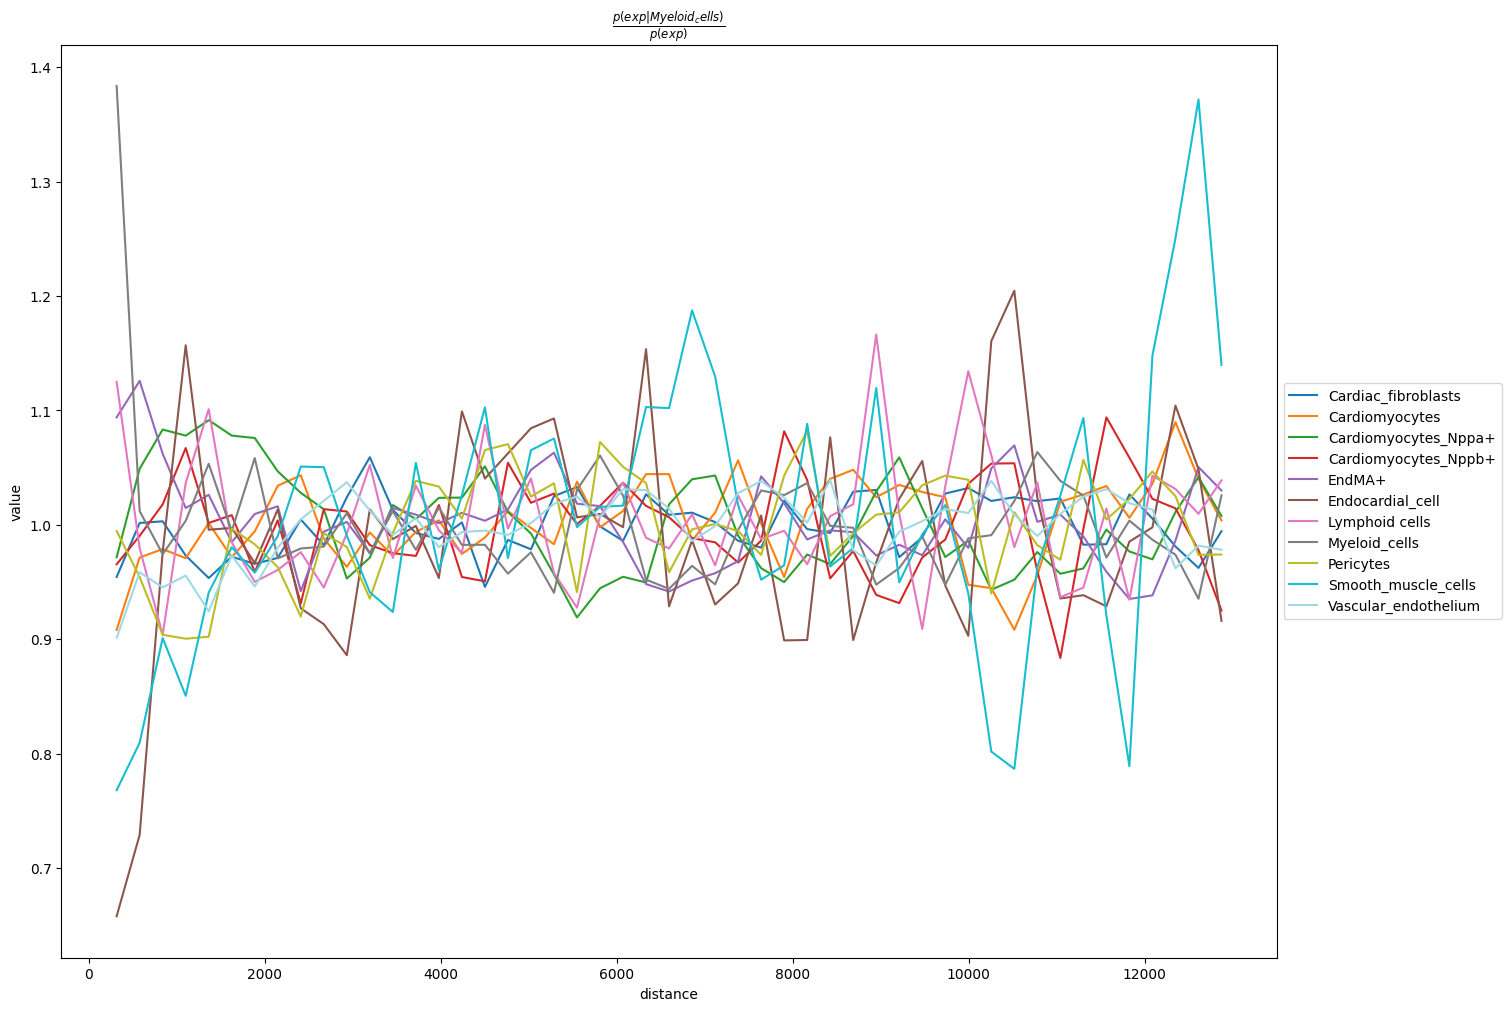

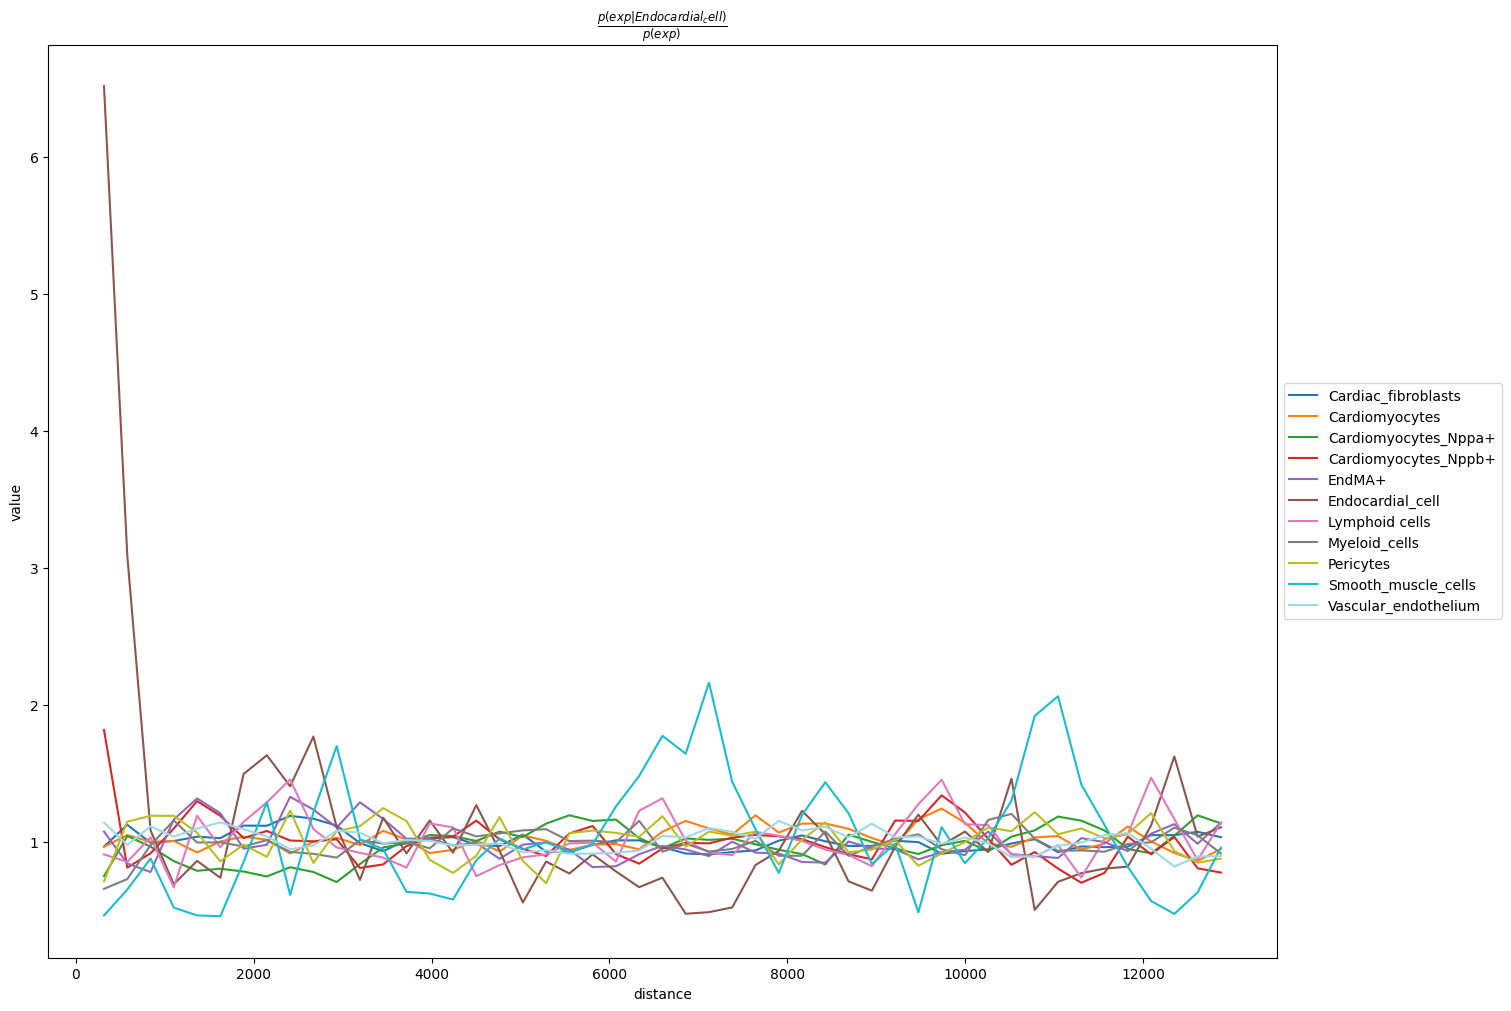

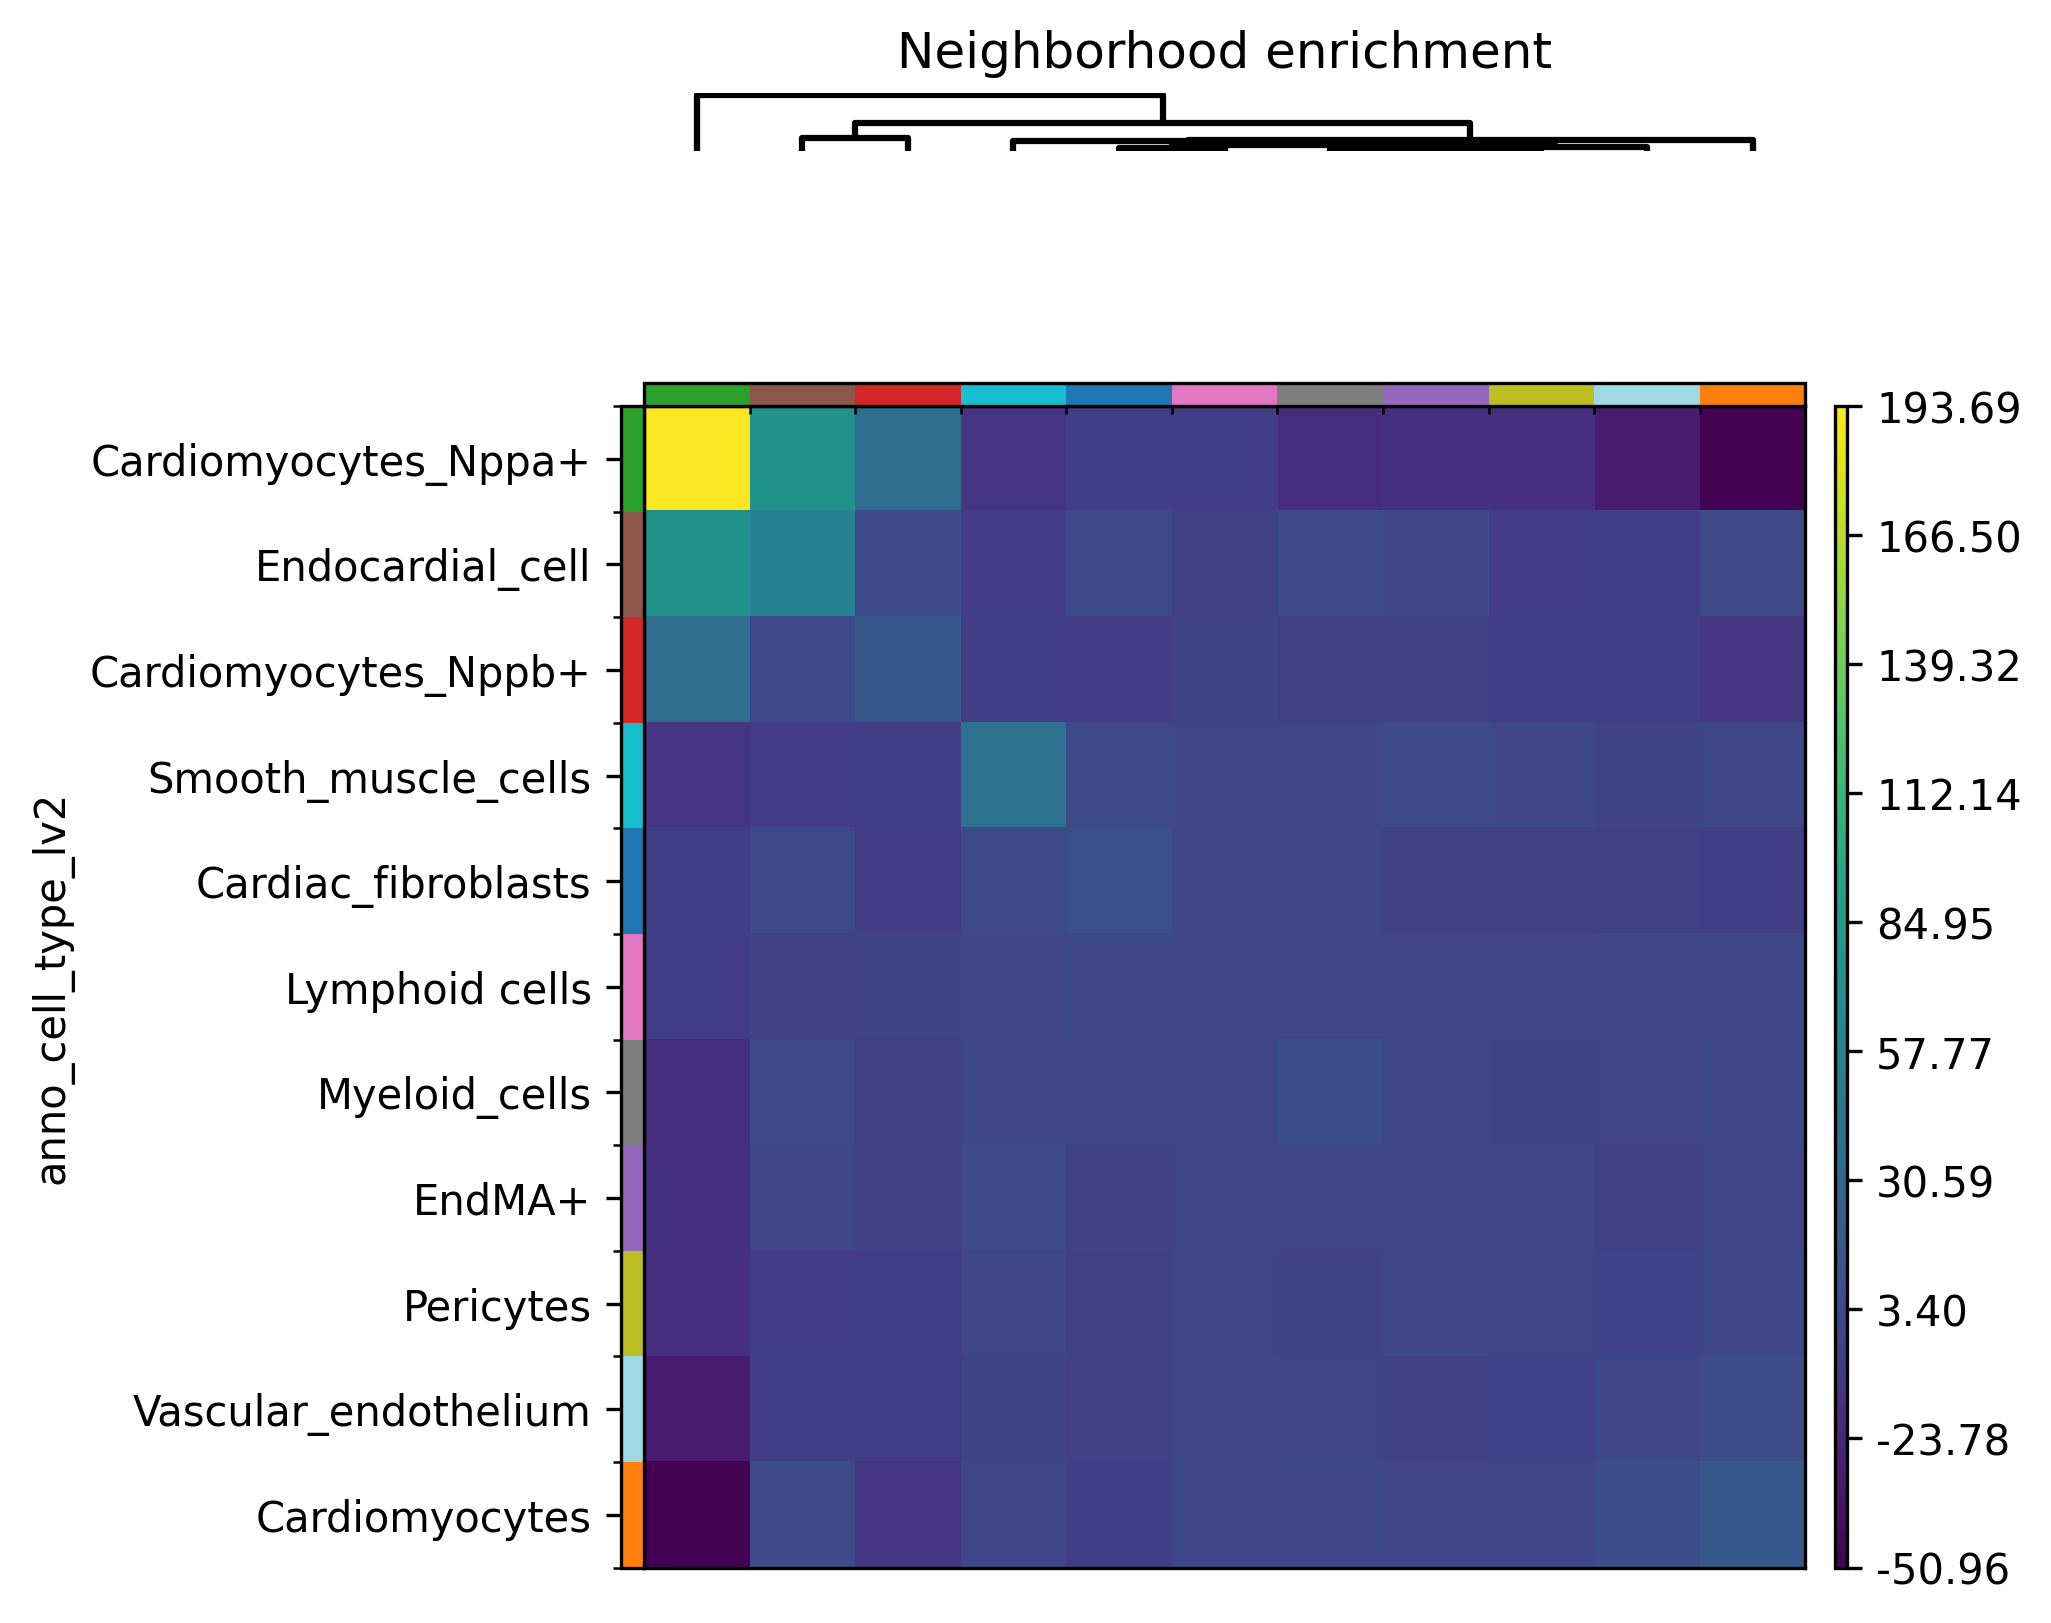

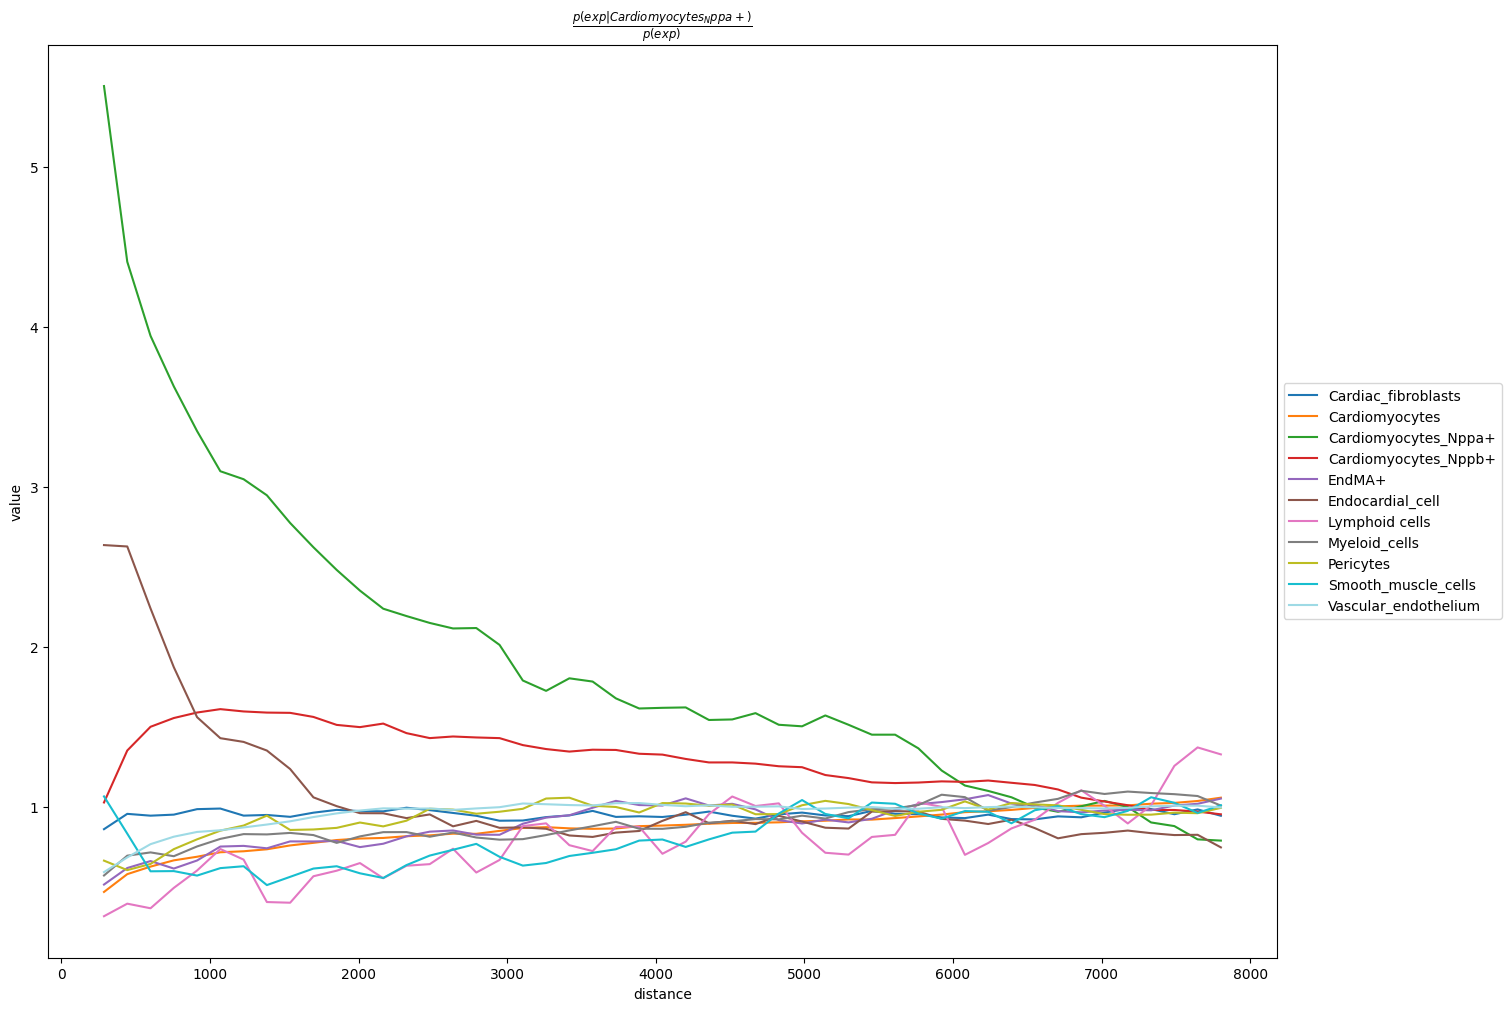

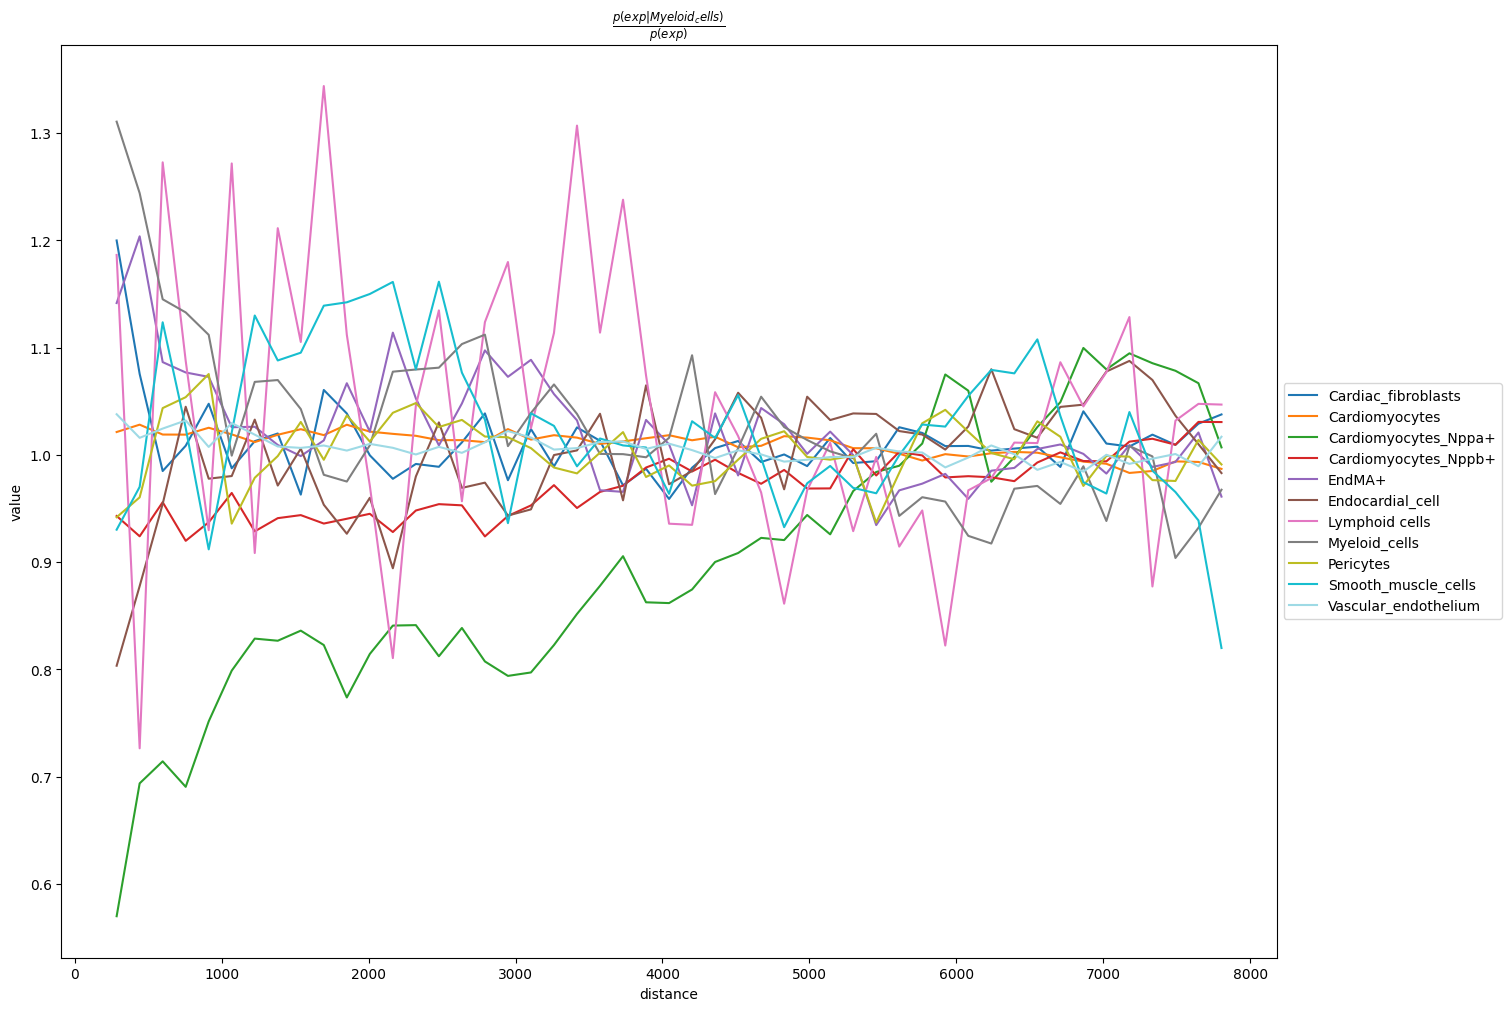

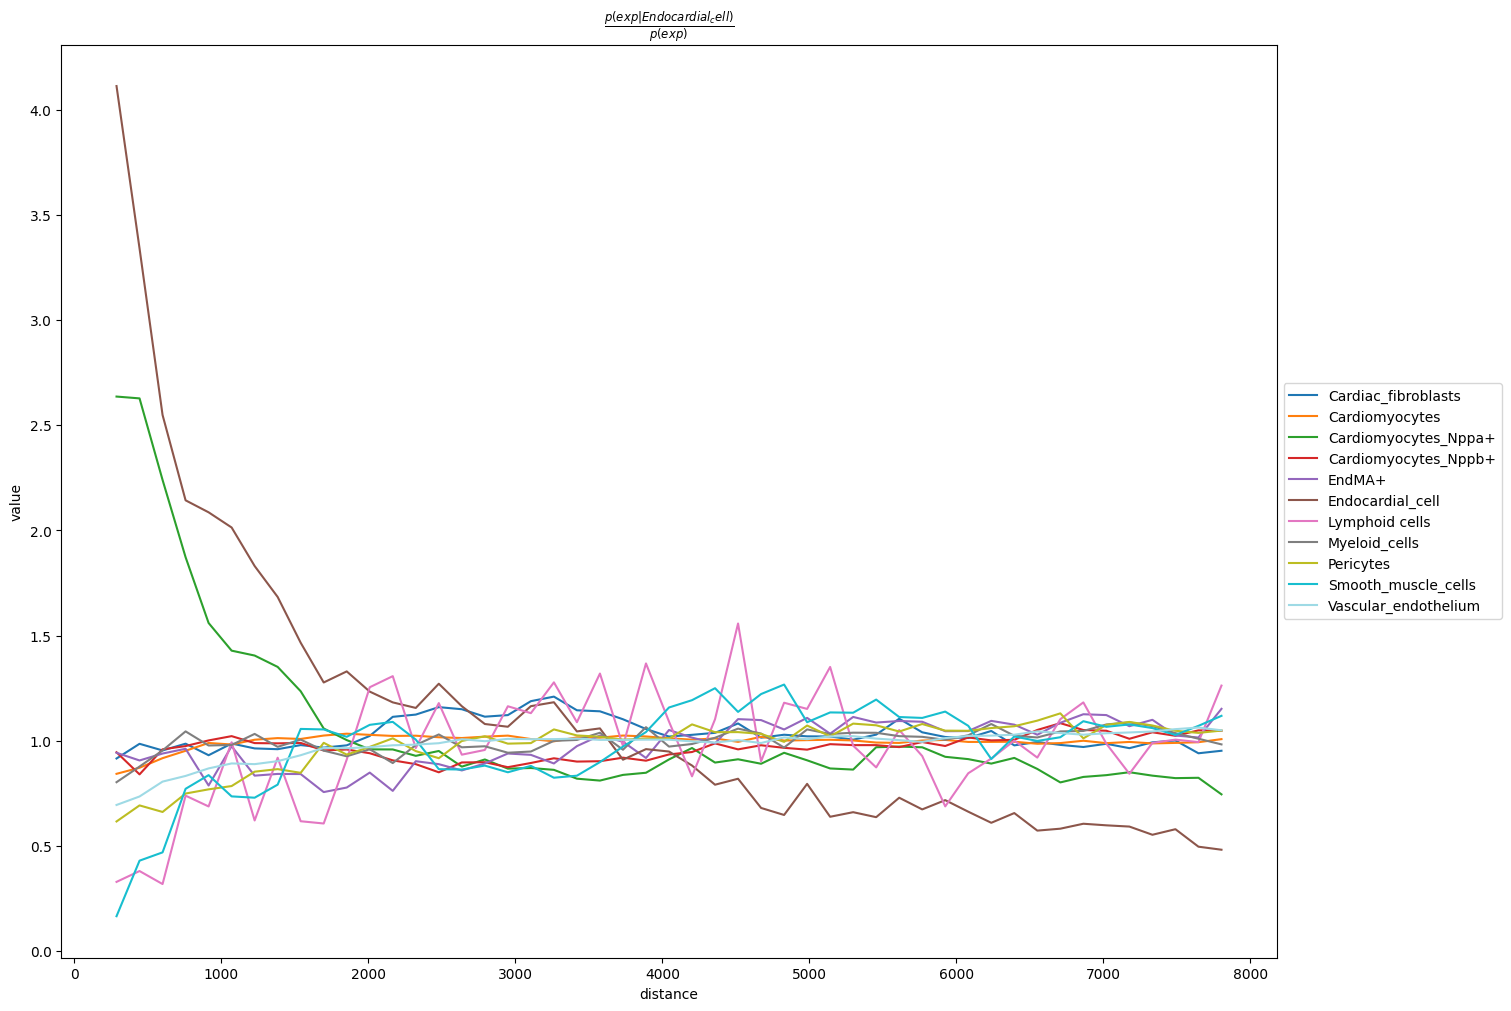

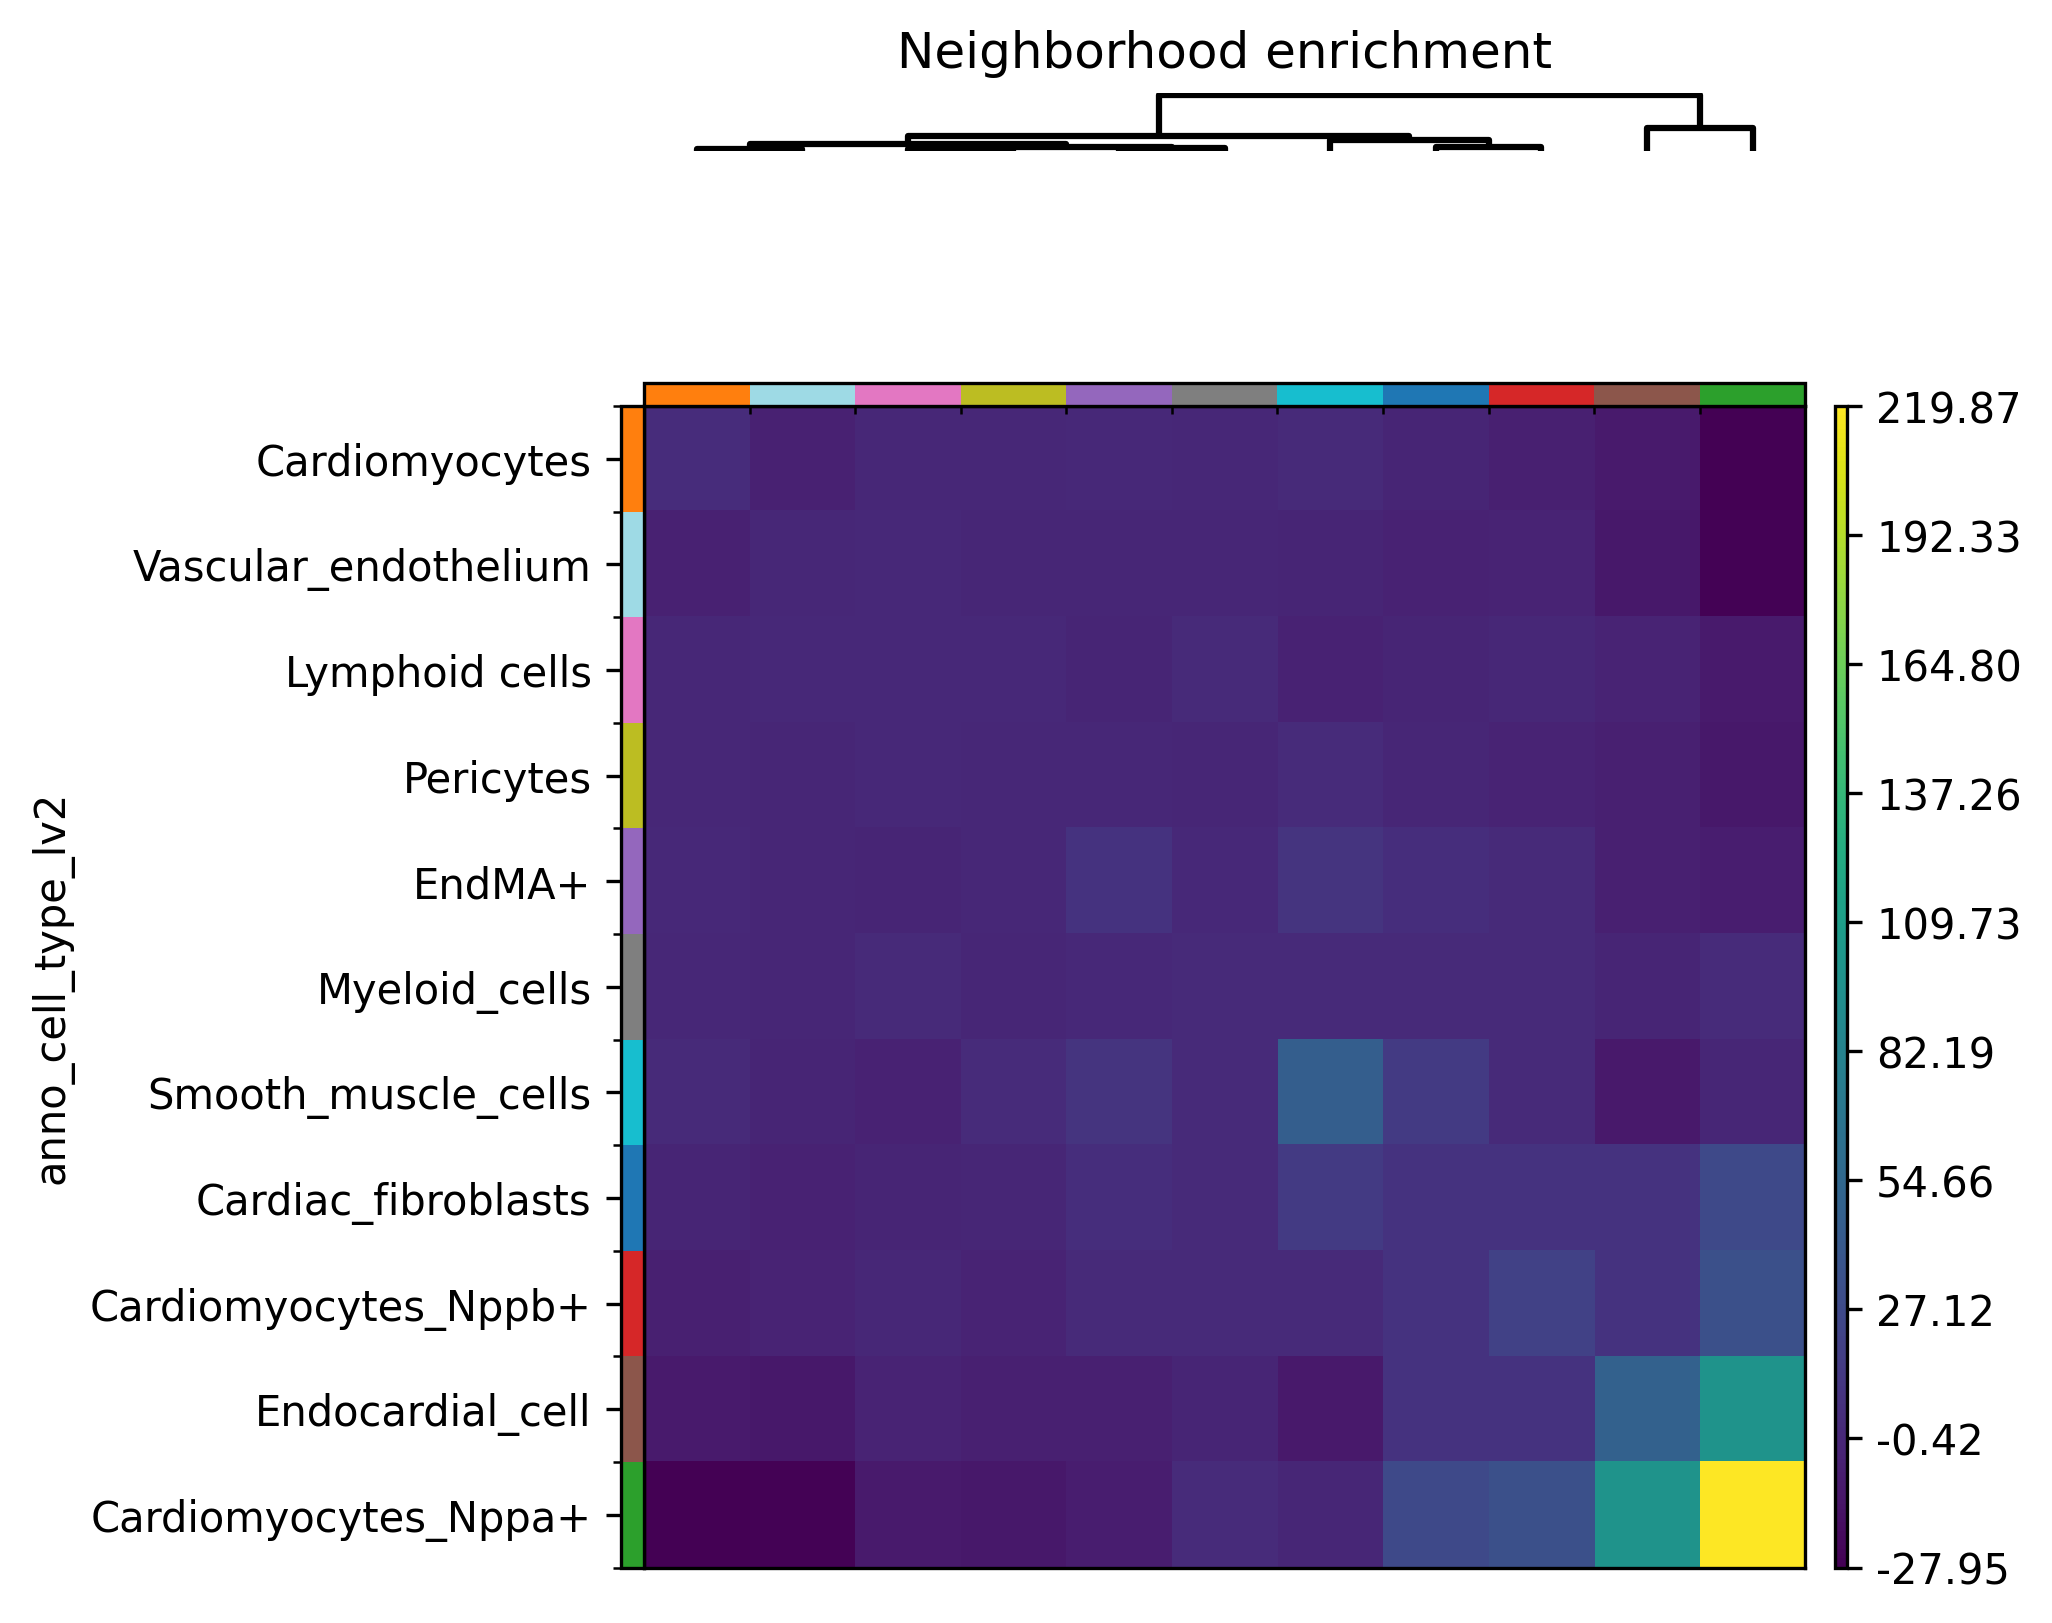

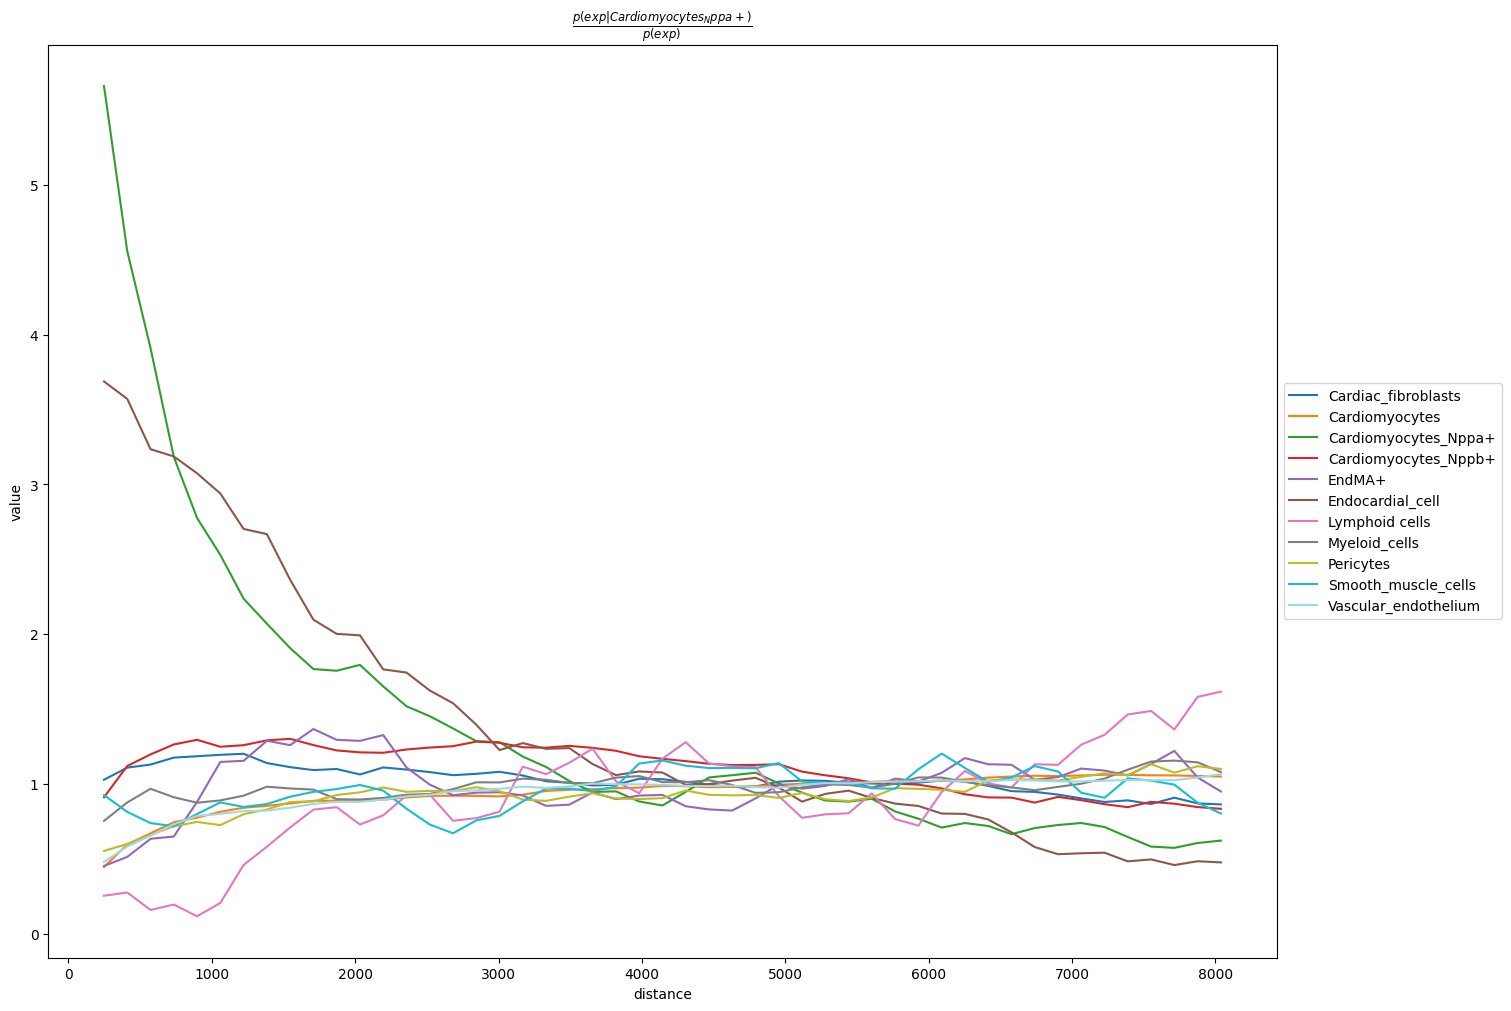

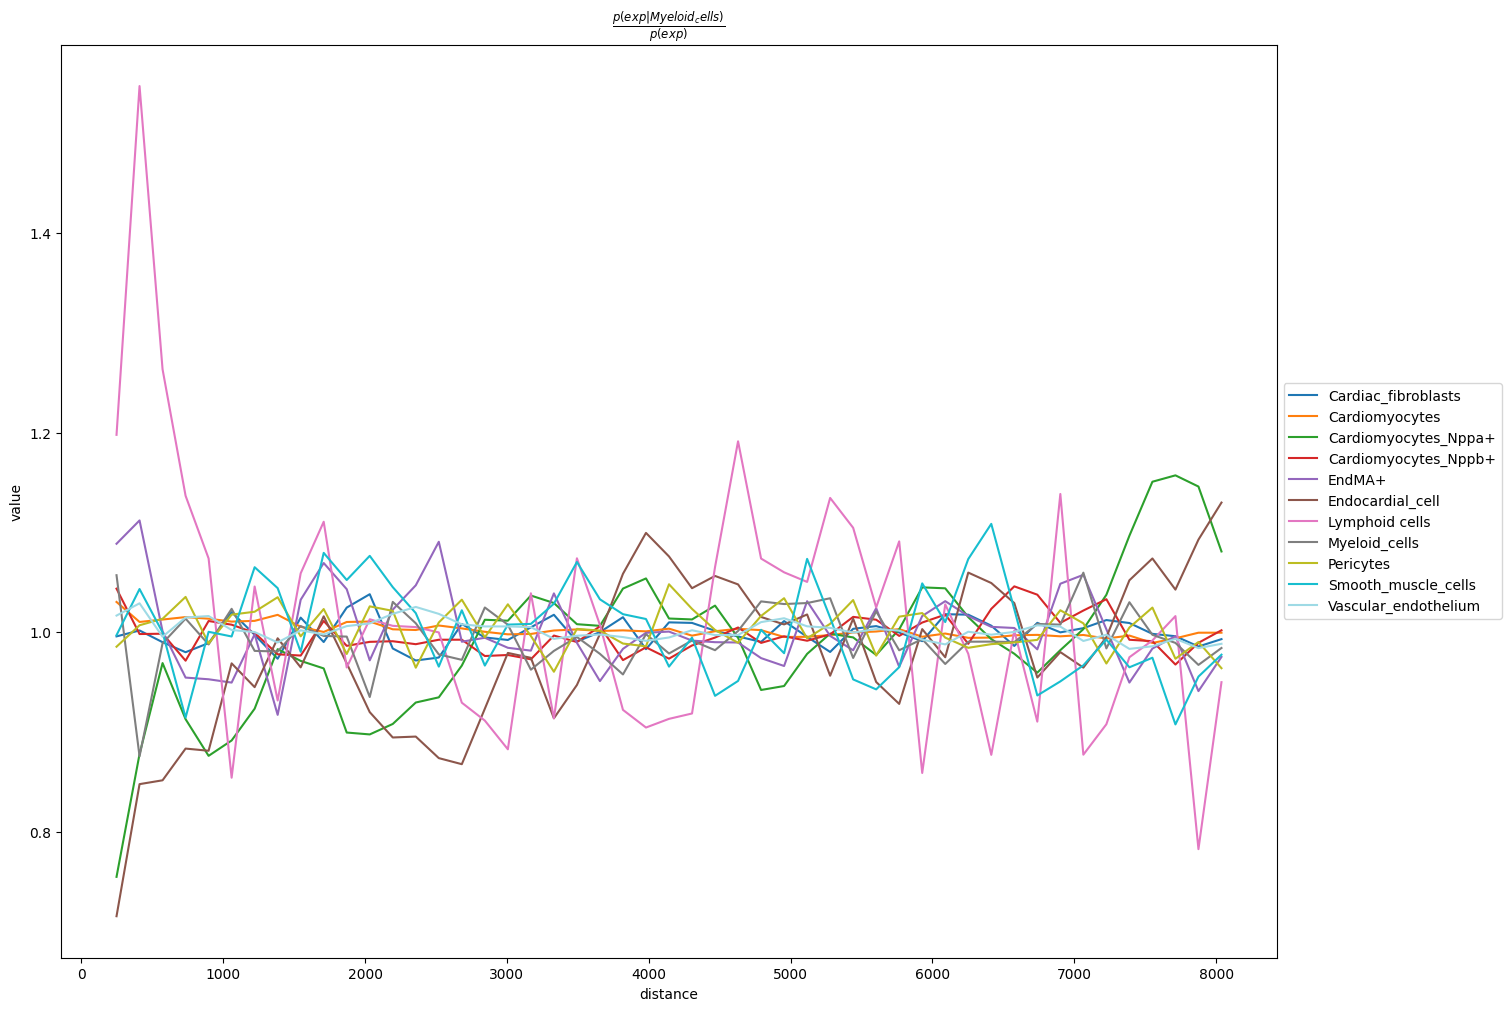

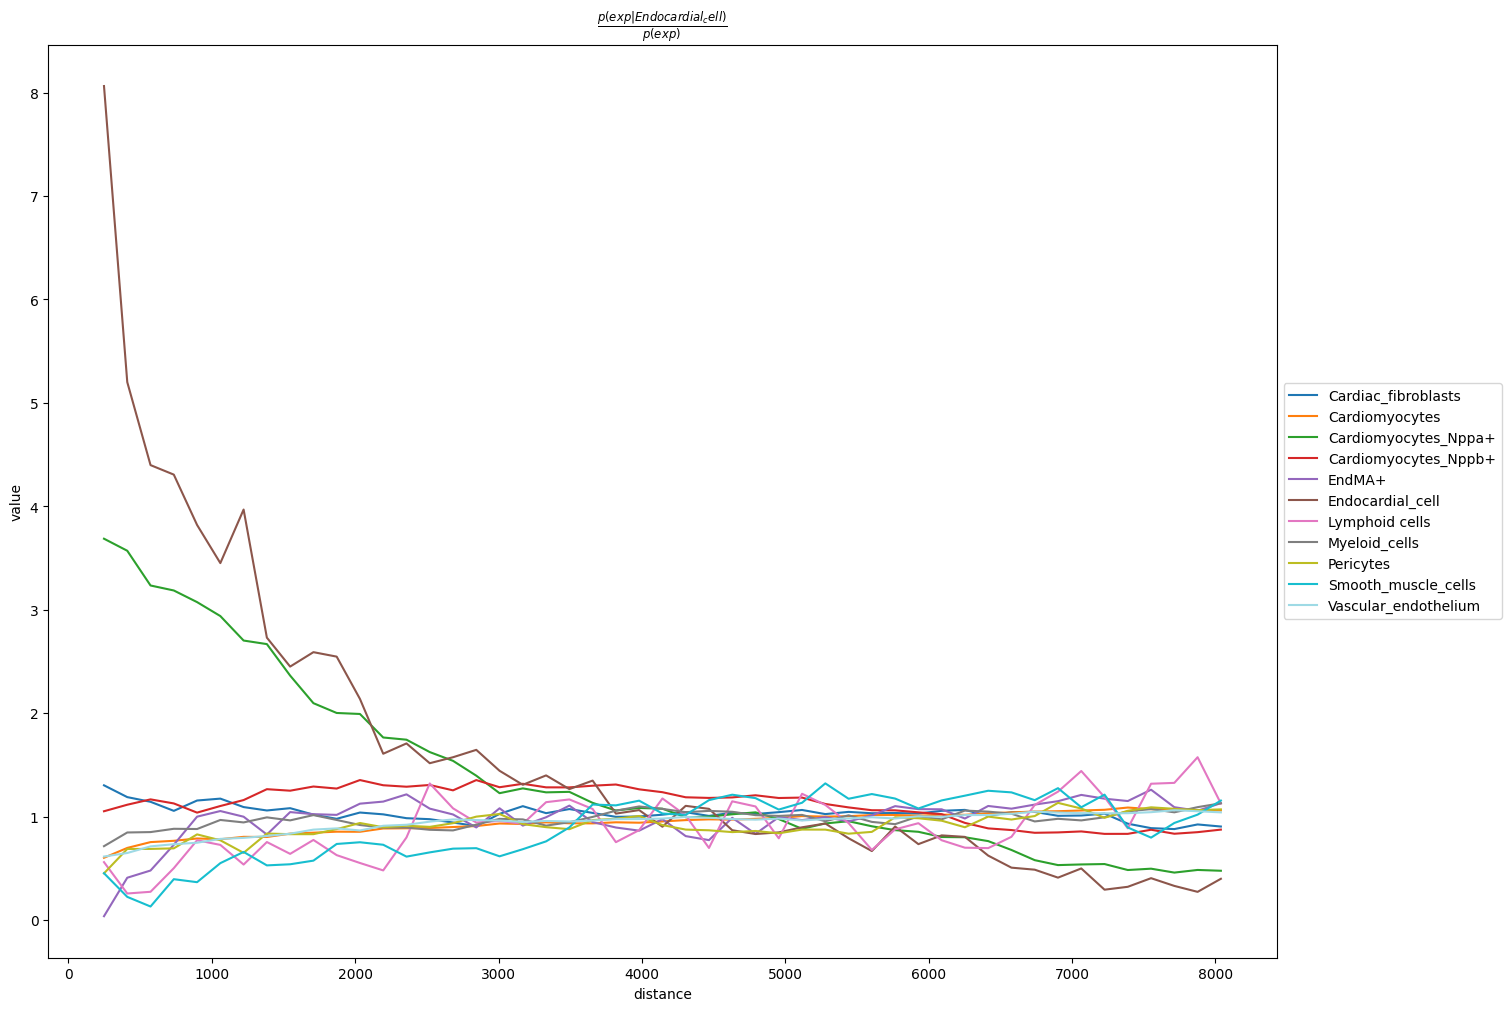

In [12]:
## Perform Squidpy analysis for all samples and save plots and results
samples_to_run = ["sample_2d_r1_s1","sample_2d_r2_s1",
        "sample_control_r1_s1","sample_control_r2_s1"]
for sample in samples_to_run:
    print(sample)
    adata = anndata_objects[sample]

    ## Calculate spatial enrichment
    sq.gr.spatial_neighbors(adata, coord_type="generic",radius=800)
    adata.obs['anno_cell_type_lv2'] = adata.obs['anno_cell_type_lv2'].astype('category')
    sq.gr.nhood_enrichment(adata, cluster_key="anno_cell_type_lv2")
    sq.pl.nhood_enrichment(adata, cluster_key="anno_cell_type_lv2", method="ward", figsize=(5, 5), dpi = 300,
                           palette="tab20",
                           save=f'/Users/florian_wuennemann/1_Projects/MI_project/mi_spatialomics/plots/molkart.squidpy.nhood_enrichment_plot.{sample}.png')

    ## Calculate spatial co-occurence
    sq.gr.co_occurrence(adata, cluster_key="anno_cell_type_lv2")
    ## Cardiomyocytes_Nppa+
    try:
        sq.pl.co_occurrence(
            adata,
            cluster_key="anno_cell_type_lv2",
            clusters="Cardiomyocytes_Nppa+",
            figsize=(15, 10),
            palette="tab20",
            save = f'/Users/florian_wuennemann/1_Projects/MI_project/mi_spatialomics/plots/molkart.squidpy.co_occurrence_plot.CMs_Nppa.{sample}.png'
        )
    except Exception as e:
        print(f"An error occurred with sample {sample}: {e}")
    ## Myeloid cells
    try:
        sq.pl.co_occurrence(
            adata,
            cluster_key="anno_cell_type_lv2",
            clusters="Myeloid_cells",
            figsize=(15, 10),
            palette="tab20",
            save = f'/Users/florian_wuennemann/1_Projects/MI_project/mi_spatialomics/plots/molkart.squidpy.co_occurrence_plot.Myeloid_cells.{sample}.png'
        )
    except Exception as e:
        print(f"An error occurred with sample {sample}: {e}")
    ## Endocardial cells
    try:
        sq.pl.co_occurrence(
            adata,
            cluster_key="anno_cell_type_lv2",
            clusters="Endocardial_cell",
            figsize=(15, 10),
            palette="tab20",
            save = f'/Users/florian_wuennemann/1_Projects/MI_project/mi_spatialomics/plots/molkart.squidpy.co_occurrence_plot.Endocardial_cells.{sample}.png'
     )
    except Exception as e:
        print(f"An error occurred with sample {sample}: {e}")

# Liana Plus

In [13]:
import pandas as pd
import scanpy as sc
import plotnine as p9
import decoupler as dc
import liana as li
import scanpy as sc
import squidpy as sq

from mudata import MuData

In [125]:
from itertools import product
cell_type_names = adata.obs['anno_cell_type_lv2'].unique()
combinations = list(product(cell_type_names, repeat=2))
combinations_list = list(combinations)
onehot_ct = pd.get_dummies(adata.obs['anno_cell_type_lv2']).astype(int)
test = sc.AnnData(X=csr_matrix(onehot_ct),
                  var=pd.DataFrame(index=onehot_ct.columns),
                  obs=adata.obs.copy(),
                  obsm=adata.obsm.copy()
)
# li.ut.spatial_neighbors(test, bandwidth=2000, cutoff=0.1, kernel='gaussian', set_diag=True)
# li.pl.connectivity(test, idx=0, size=1.3)

# li.mt.lr_bivar(test,
#                function_name='jaccard', # Name of the function
#                n_perms=100, # Number of permutations to calculate a p-value
#                mask_negatives=False, # Whether to mask LowLow/NegativeNegative interactions
#                add_categories=True, # Whether to add local categories to the results
#                expr_prop=0.01, # Minimum expr. proportion for ligands/receptors and their subunits
#                use_raw=False,
#                verbose=True,
#                interactions = combinations_list)

In [ ]:
li.pl.connectivity(test, idx=0, size=1.3)

In [117]:
lrdata = test.obsm['local_scores']
lrdata.uns['global_res'].sort_values("global_mean", ascending=False)
#lrdata.uns['global_res'].sort_values("global_sd", ascending=False)
#sc.pl.spatial(lrdata, color=['Cardiomyocytes_Nppa+^Endocardial_cell'], vmax=1, spot_size = 150)

interaction                ligand  \
0          Vascular_endothelium^Cardiomyocytes  Vascular_endothelium   
84                 Cardiomyocytes_Nppa+^EndMA+  Cardiomyocytes_Nppa+   
82                            Pericytes^EndMA+             Pericytes   
81                       Cardiomyocytes^EndMA+        Cardiomyocytes   
80                 Vascular_endothelium^EndMA+  Vascular_endothelium   
..                                         ...                   ...   
31         Cardiomyocytes^Cardiomyocytes_Nppa+        Cardiomyocytes   
30   Vascular_endothelium^Cardiomyocytes_Nppa+  Vascular_endothelium   
29    Smooth_muscle_cells^Cardiomyocytes_Nppb+   Smooth_muscle_cells   
28                 EndMA+^Cardiomyocytes_Nppb+                EndMA+   
109   Smooth_muscle_cells^Vascular_endothelium   Smooth_muscle_cells   

     ligand_means  ligand_props              receptor  receptor_means  \
0        0.286628      0.286622        Cardiomyocytes        0.413959   
84       0.064794      0.064795                EndMA+        0.013658   
82       0.024266      0.024266                EndMA+        0.013658   
81       0.413959      0.413925                EndMA+        0.013658   
80       0.286628      0.286622                EndMA+        0.013658   
..            ...           ...                   ...             ...   
31       0.413959      0.413925  Cardiomyocytes_Nppa+        0.064794   
30       0.286628      0.286622  Cardiomyocytes_Nppa+        0.064794   
29       0.013404      0.013404  Cardiomyocytes_Nppb+        0.074259   
28       0.013658      0.013658  Cardiomyocytes_Nppb+        0.074259   
109      0.013404      0.013404  Vascular_endothelium        0.286628   

     receptor_props  global_mean  global_sd  
0          0.413925          0.0        0.0  
84         0.013658          0.0        0.0  
82         0.013658          0.0        0.0  
81         0.013658          0.0        0.0  
80         0.013658          0.0        0.0  
..              ...          ...        ...  
31         0.064795          0.0        0.0  
30         0.064795          0.0        0.0  
29         0.074260          0.0        0.0  
28         0.074260          0.0        0.0  
109        0.286622          0.0        0.0  

[90 rows x 9 columns]

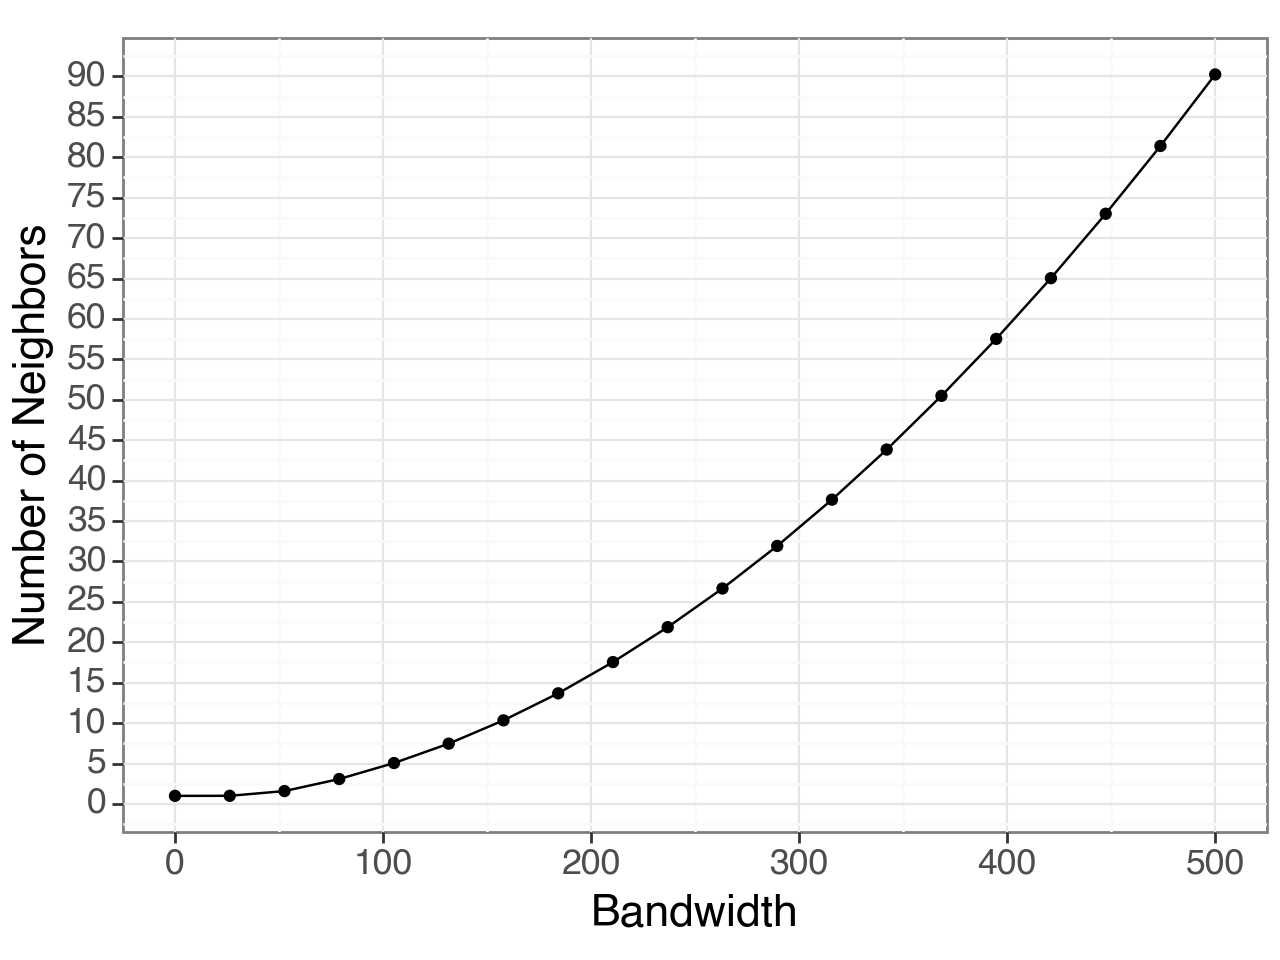

<Figure Size: (640 x 480)>

In [63]:
plot, _ = li.ut.query_bandwidth(coordinates=test.obsm['spatial'], start=0, end=500, interval_n=20)
plot + p9.scale_y_continuous(breaks=range(0, 500, 5))

In [126]:
test.write('/Users/florian_wuennemann/Downloads/florian_test.lianaplus.h5ad')

... storing 'anno_cell_type_lvl1' as categorical
... storing 'anno_cell_type_lv2' as categorical
... storing 'anno_cell_type_lvl3' as categorical


# Daniel's fixed code

In [36]:
anndata_objects.keys()

dict_keys(['sample_2d_r1_s1', 'sample_2d_r2_s1', 'sample_4d_r1_s1', 'sample_4d_r2_s1', 'sample_4h_r1_s1', 'sample_4h_r2_s2', 'sample_control_r1_s1', 'sample_control_r2_s1'])

sample_2d_r2_s1


Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


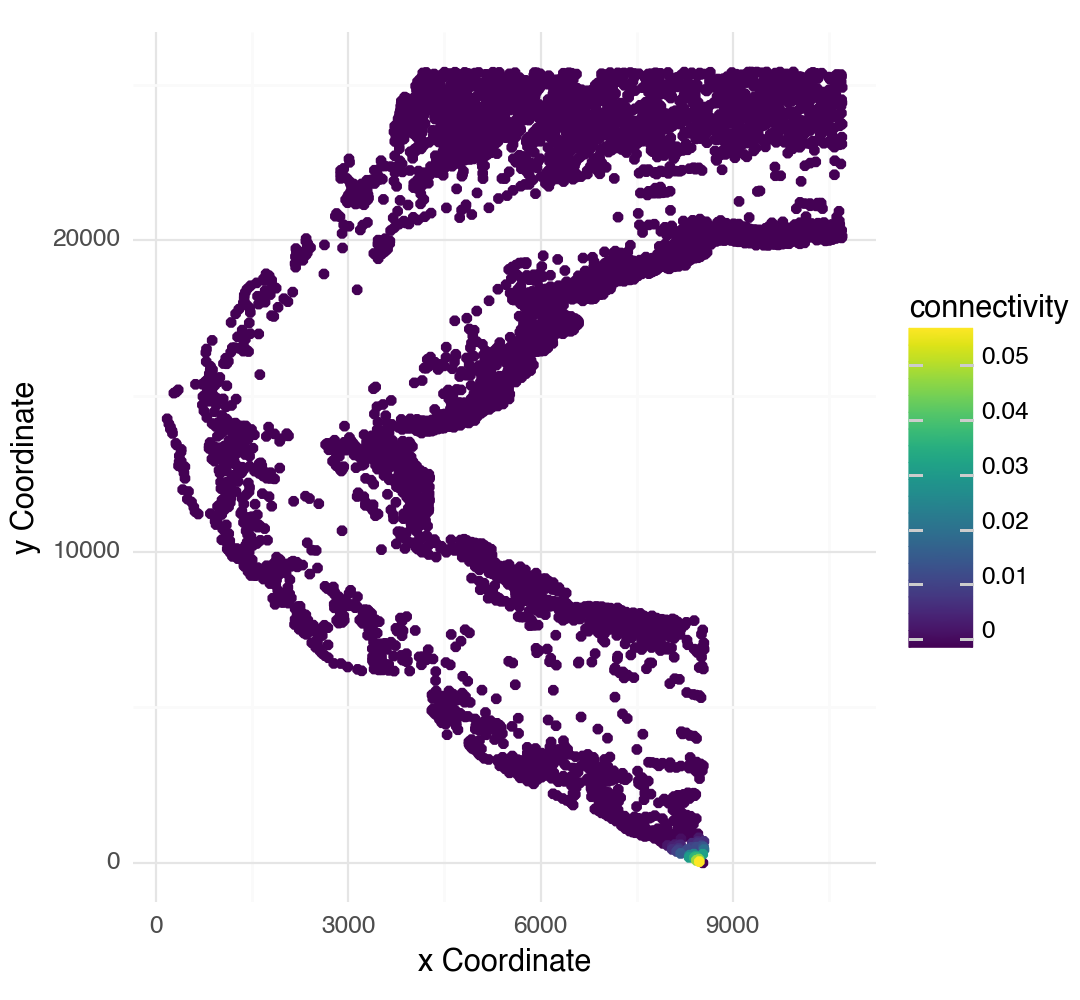

<Figure Size: (540 x 500)>

In [57]:
import pandas as pd
import squidpy as sq
import scanpy as sc
import liana as li
from itertools import product
from scipy.sparse import csr_matrix

sample = list(anndata_objects.keys())[1]
print(sample)
adata = anndata_objects[sample]
cell_type_names = adata.obs['anno_cell_type_lv2'].unique()

onehot_ct = pd.get_dummies(adata.obs['anno_cell_type_lv2']).astype(int)
#onehot_ct.columns = onehot_ct.columns.str.replace('', ' ')

combinations = list(product(onehot_ct.columns, repeat=2))
adata = sc.AnnData(X=csr_matrix(onehot_ct.values),
                var=pd.DataFrame(index=onehot_ct.columns),
                obs=adata.obs.copy(),
                obsm=adata.obsm.copy(),
                uns=adata.uns.copy(),)

li.ut.spatial_neighbors(adata, bandwidth=400, cutoff=0.1, kernel='gaussian', set_diag=False, standardize=True)
li.pl.connectivity(adata, idx=0, size=1.3)

Using provided `interactions`.
Using `.X`!
Make sure that normalized counts are passed!
['Cardiac_fibroblasts', 'Cardiomyocytes_Nppa+', 'Cardiomyocytes_Nppb+', 'Endocardial_cell', 'Myeloid_cells', 'Smooth_muscle_cells', 'Vascular_endothelium'] contain `_`. Consider replacing those!
Removing 11 self-interactions















































































































































































































































































































100%|██████████| 100/100 [00:47<00:00,  2.12it/s]
... storing 'anno_cell_type_lvl1' as categorical
... storing 'anno_cell_type_lvl3' as categorical


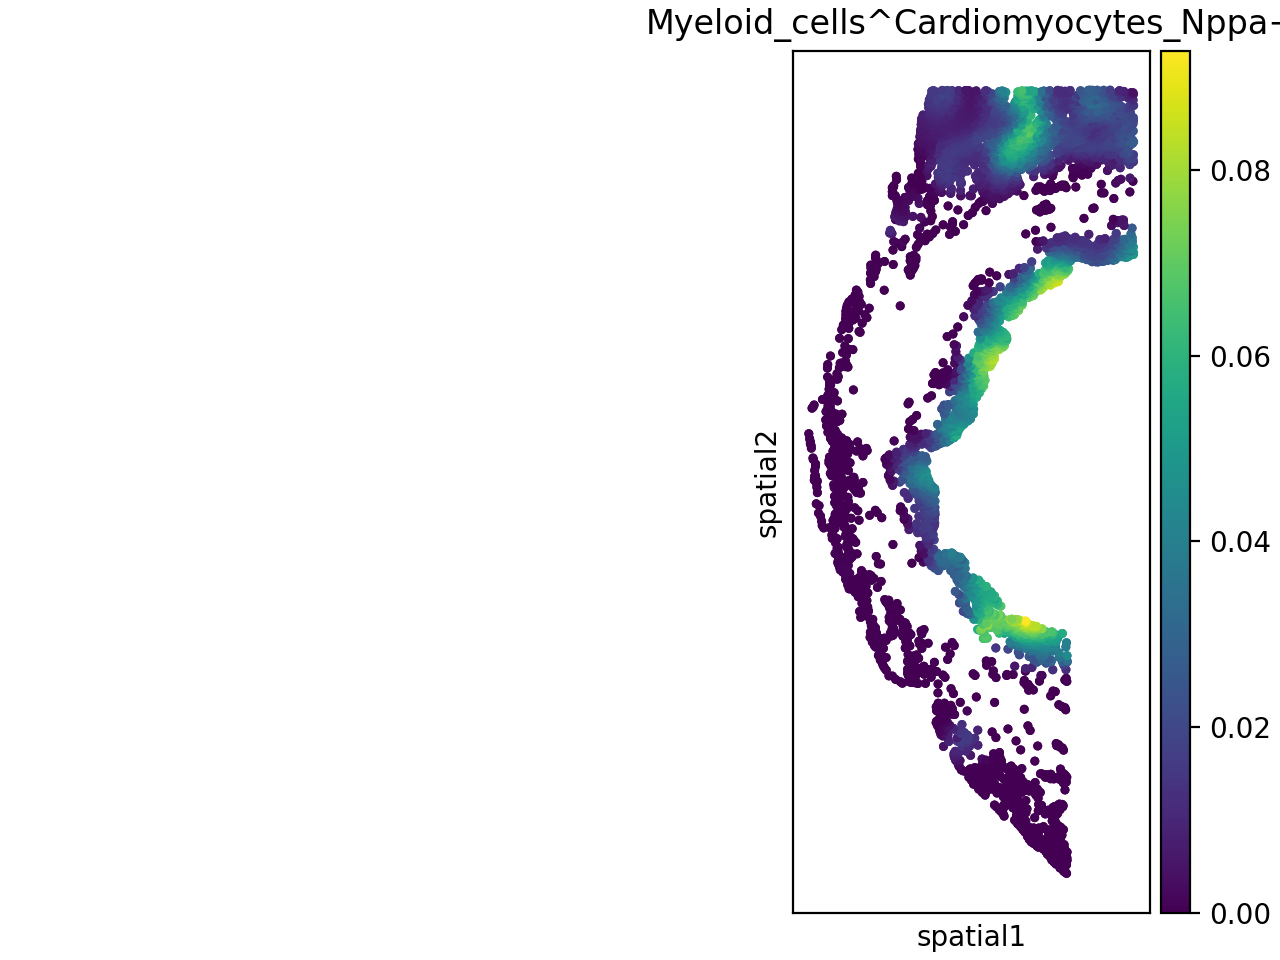

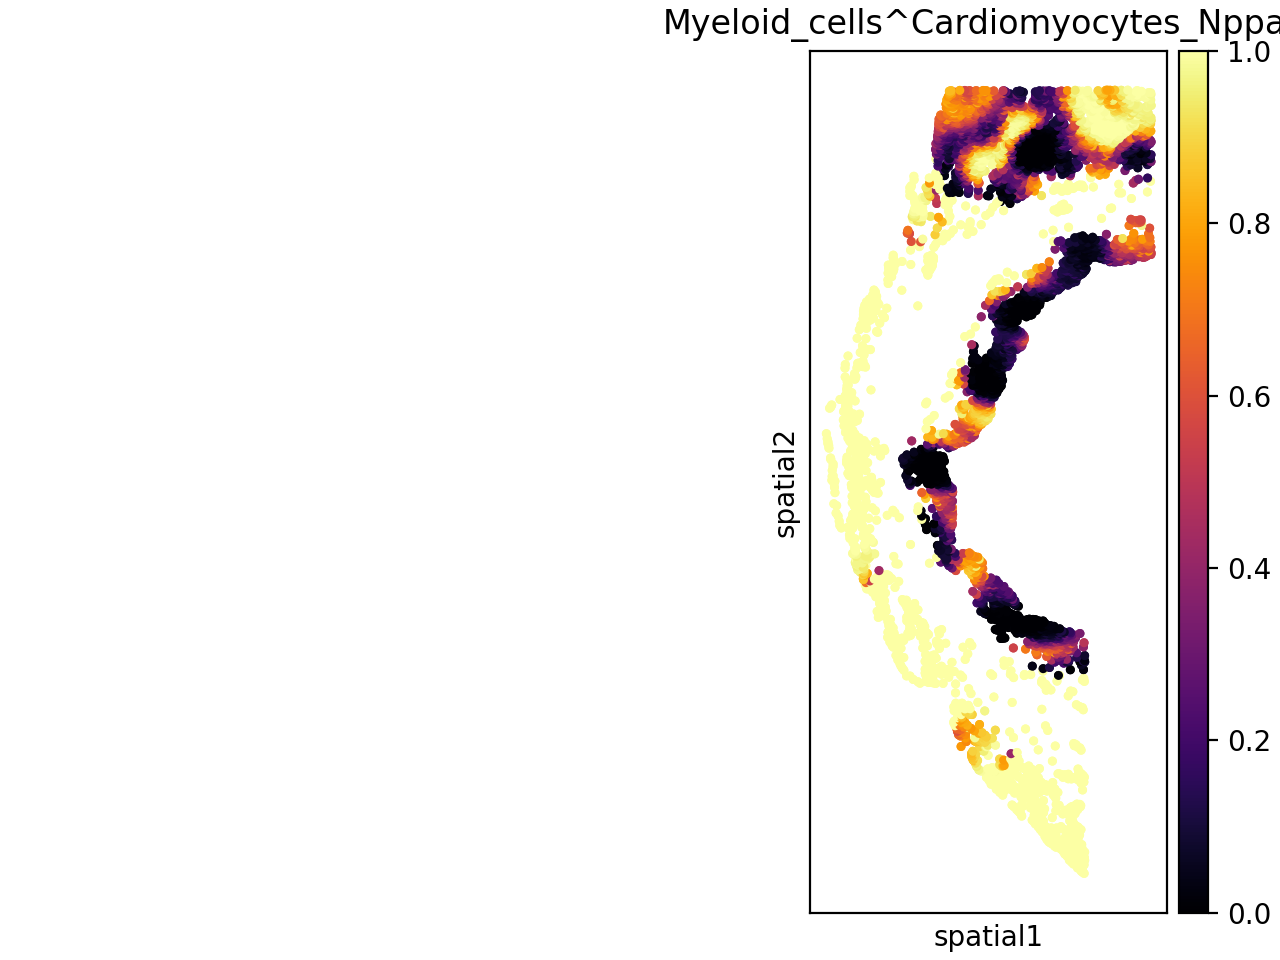

In [58]:
li.mt.lr_bivar(adata,
            function_name='product', # Name of the function
            n_perms=100, # Number of permutations to calculate a p-value
            mask_negatives=False, # Whether to mask LowLow/NegativeNegative interactions
            add_categories=False, # Whether to add local categories to the results
            expr_prop=0.1, # Minimum expr. proportion for ligands/receptors and their subunits
            use_raw=False,
            verbose=True,
            interactions = combinations
            )
lrdata = adata.obsm['local_scores']

sq.pl.spatial_scatter(
    lrdata,
    library_id="spatial",
    color=[
        "Myeloid_cells^Cardiomyocytes_Nppa+",
    ],
    shape=None,
    size=20,
    img=False,
    layer=None,
    cmap="viridis",
)

sq.pl.spatial_scatter(
    lrdata,
    library_id="spatial",
    color=[
        "Myeloid_cells^Cardiomyocytes_Nppa+",
    ],
    shape=None,
    size=20,
    img=False,
    layer="pvals",
    cmap="inferno",
)

In [55]:
lrdata.uns['global_res'].sort_values("global_mean", ascending=False)

interaction                ligand  ligand_means  \
9   Vascular_endothelium^Cardiomyocytes  Vascular_endothelium      0.352178   
91  Cardiomyocytes^Vascular_endothelium        Cardiomyocytes      0.315434   

    ligand_props              receptor  receptor_means  receptor_props  \
9       0.352166        Cardiomyocytes        0.315434        0.315428   
91      0.315428  Vascular_endothelium        0.352178        0.352166   

    global_mean  global_sd  
9      0.087557   0.056115  
91     0.087557   0.056115

In [56]:
sample

'sample_4h_r1_s1'

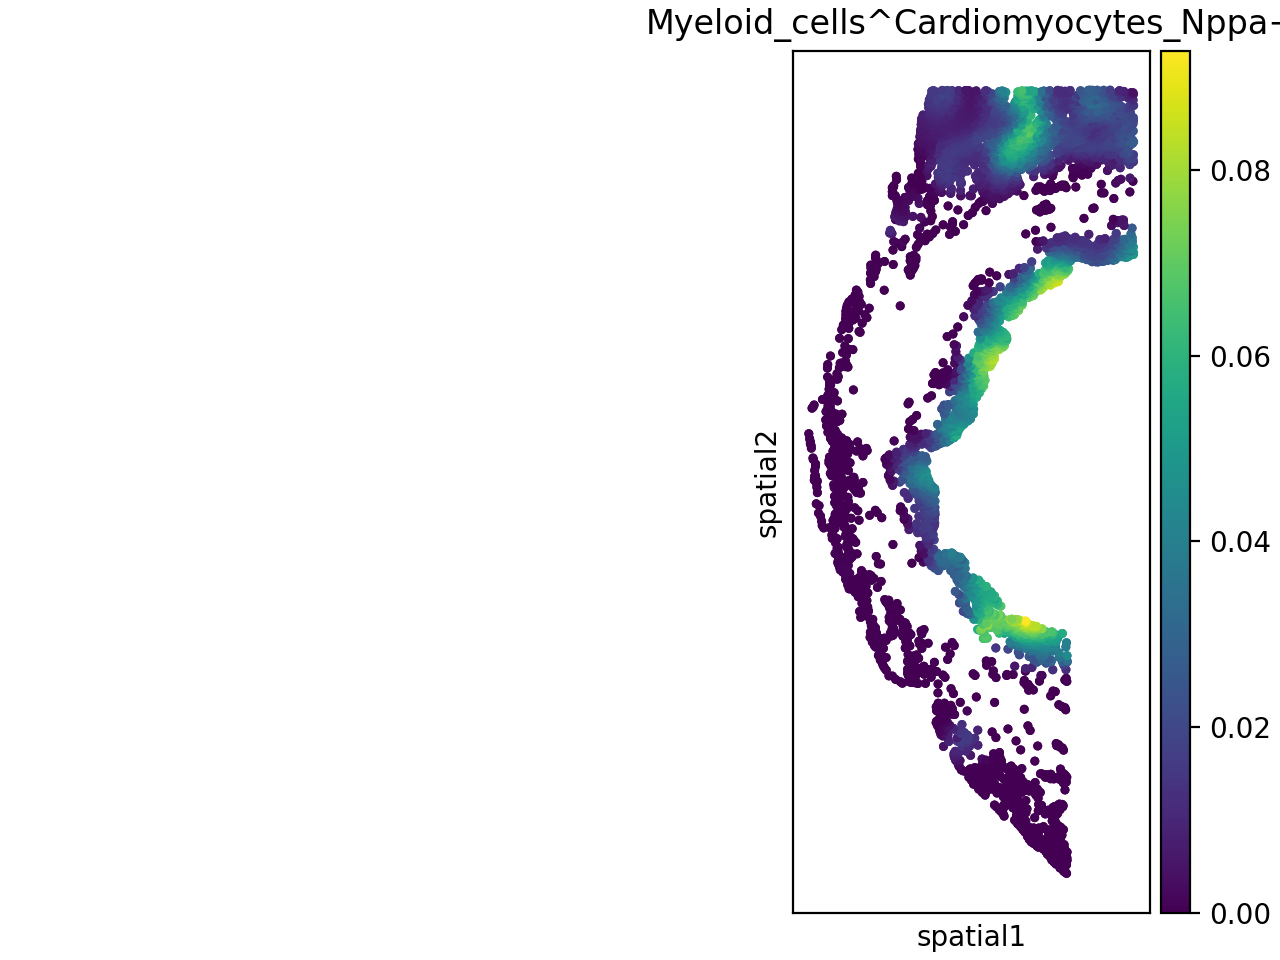

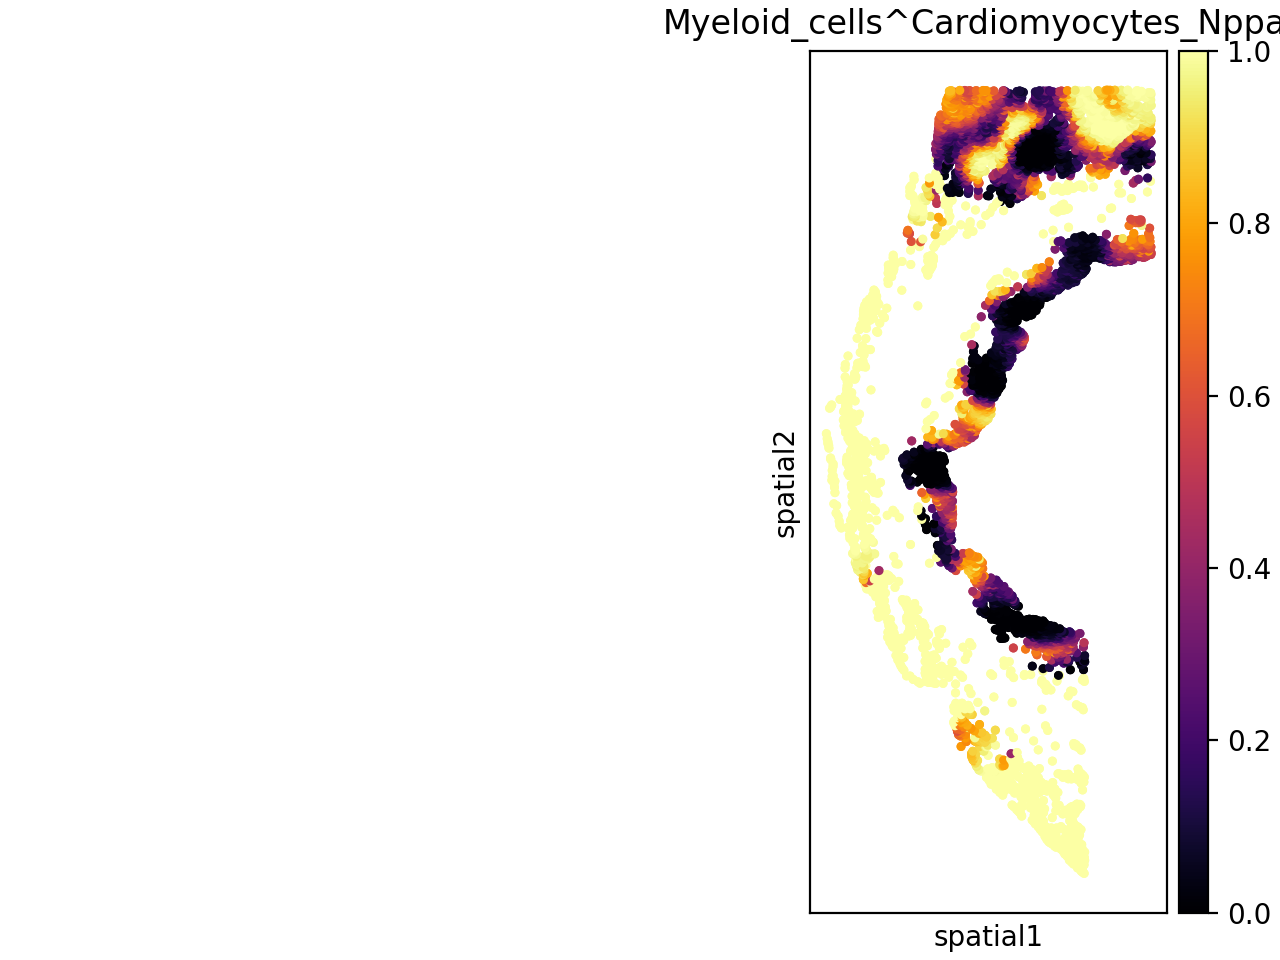

In [61]:
sq.pl.spatial_scatter(
    lrdata,
    library_id="spatial",
    color=["Myeloid_cells^Cardiomyocytes_Nppa+"],
    shape=None,
    size=20,
    img=False,
    layer=None,
    cmap="viridis",
)

sq.pl.spatial_scatter(
    lrdata,
    library_id="spatial",
    color=["Myeloid_cells^Cardiomyocytes_Nppa+"],
    shape=None,
    size=20,
    img=False,
    layer="pvals",
    cmap="inferno",
)